In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [152]:
%run _functions.ipynb

In [4]:
save_files = 'files/Section2-Explore-and-Clean'

In [5]:
save_img = 'docs/img/Section2-Explore-and-Clean'

In [6]:
session_name = 'Section2-Explore-and-Clean'

# Section II. Data Explore and Clean

## Load Saved Section if exists

## Load Data

In [7]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section1-Overview-and-Base-model')
features_dict = loadit(
    'features_dict', dir='Section1-Overview-and-Base-model')
simulation_datasets_dict = loadit(
    'simulation_datasets_dict', dir='Section1-Overview-and-Base-model')
estimators_dict = loadit(
    'estimators_dict', dir='Section1-Overview-and-Base-model')
evaluation_dict = loadit(
    'evaluation_dict', dir='Section1-Overview-and-Base-model')
# datasets
train = datasets_dict['train']
# features
features = features_dict['features']
numeric = features_dict['numeric']
ordinal = features_dict['ordinal']
categorical = features_dict['categorical']
categorical_transform = features_dict['categorical_transform']
target = features_dict['target']

## Correlation Matrix

In [8]:
corr_df = train[numeric + ordinal + [target]].corr()

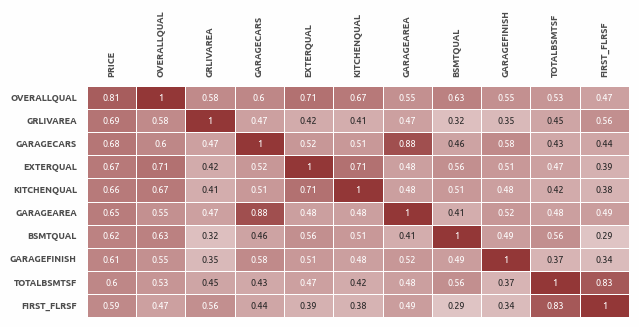

Images 'corr_matrix.png' and 'corr_matrix.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [9]:
fig = plot_corr_matrix(
    data=corr_df, target=target, num_features=10,
    width=0.7, height=0.3, annot=6.5, labelsize=6.5,
    linecolor=theme, full=True, abs_results=True,
    df=False, df_limit=None, vars_weight='bold'
)
savefig('corr_matrix', save_img, dpi=110)

## Visualization

**Result**:  Outliers suspect - lotfrontge, lotarea, bsmtfinsf_first, totalbsmtsf, first_flrsf, grlivarea, garagearea, miscval

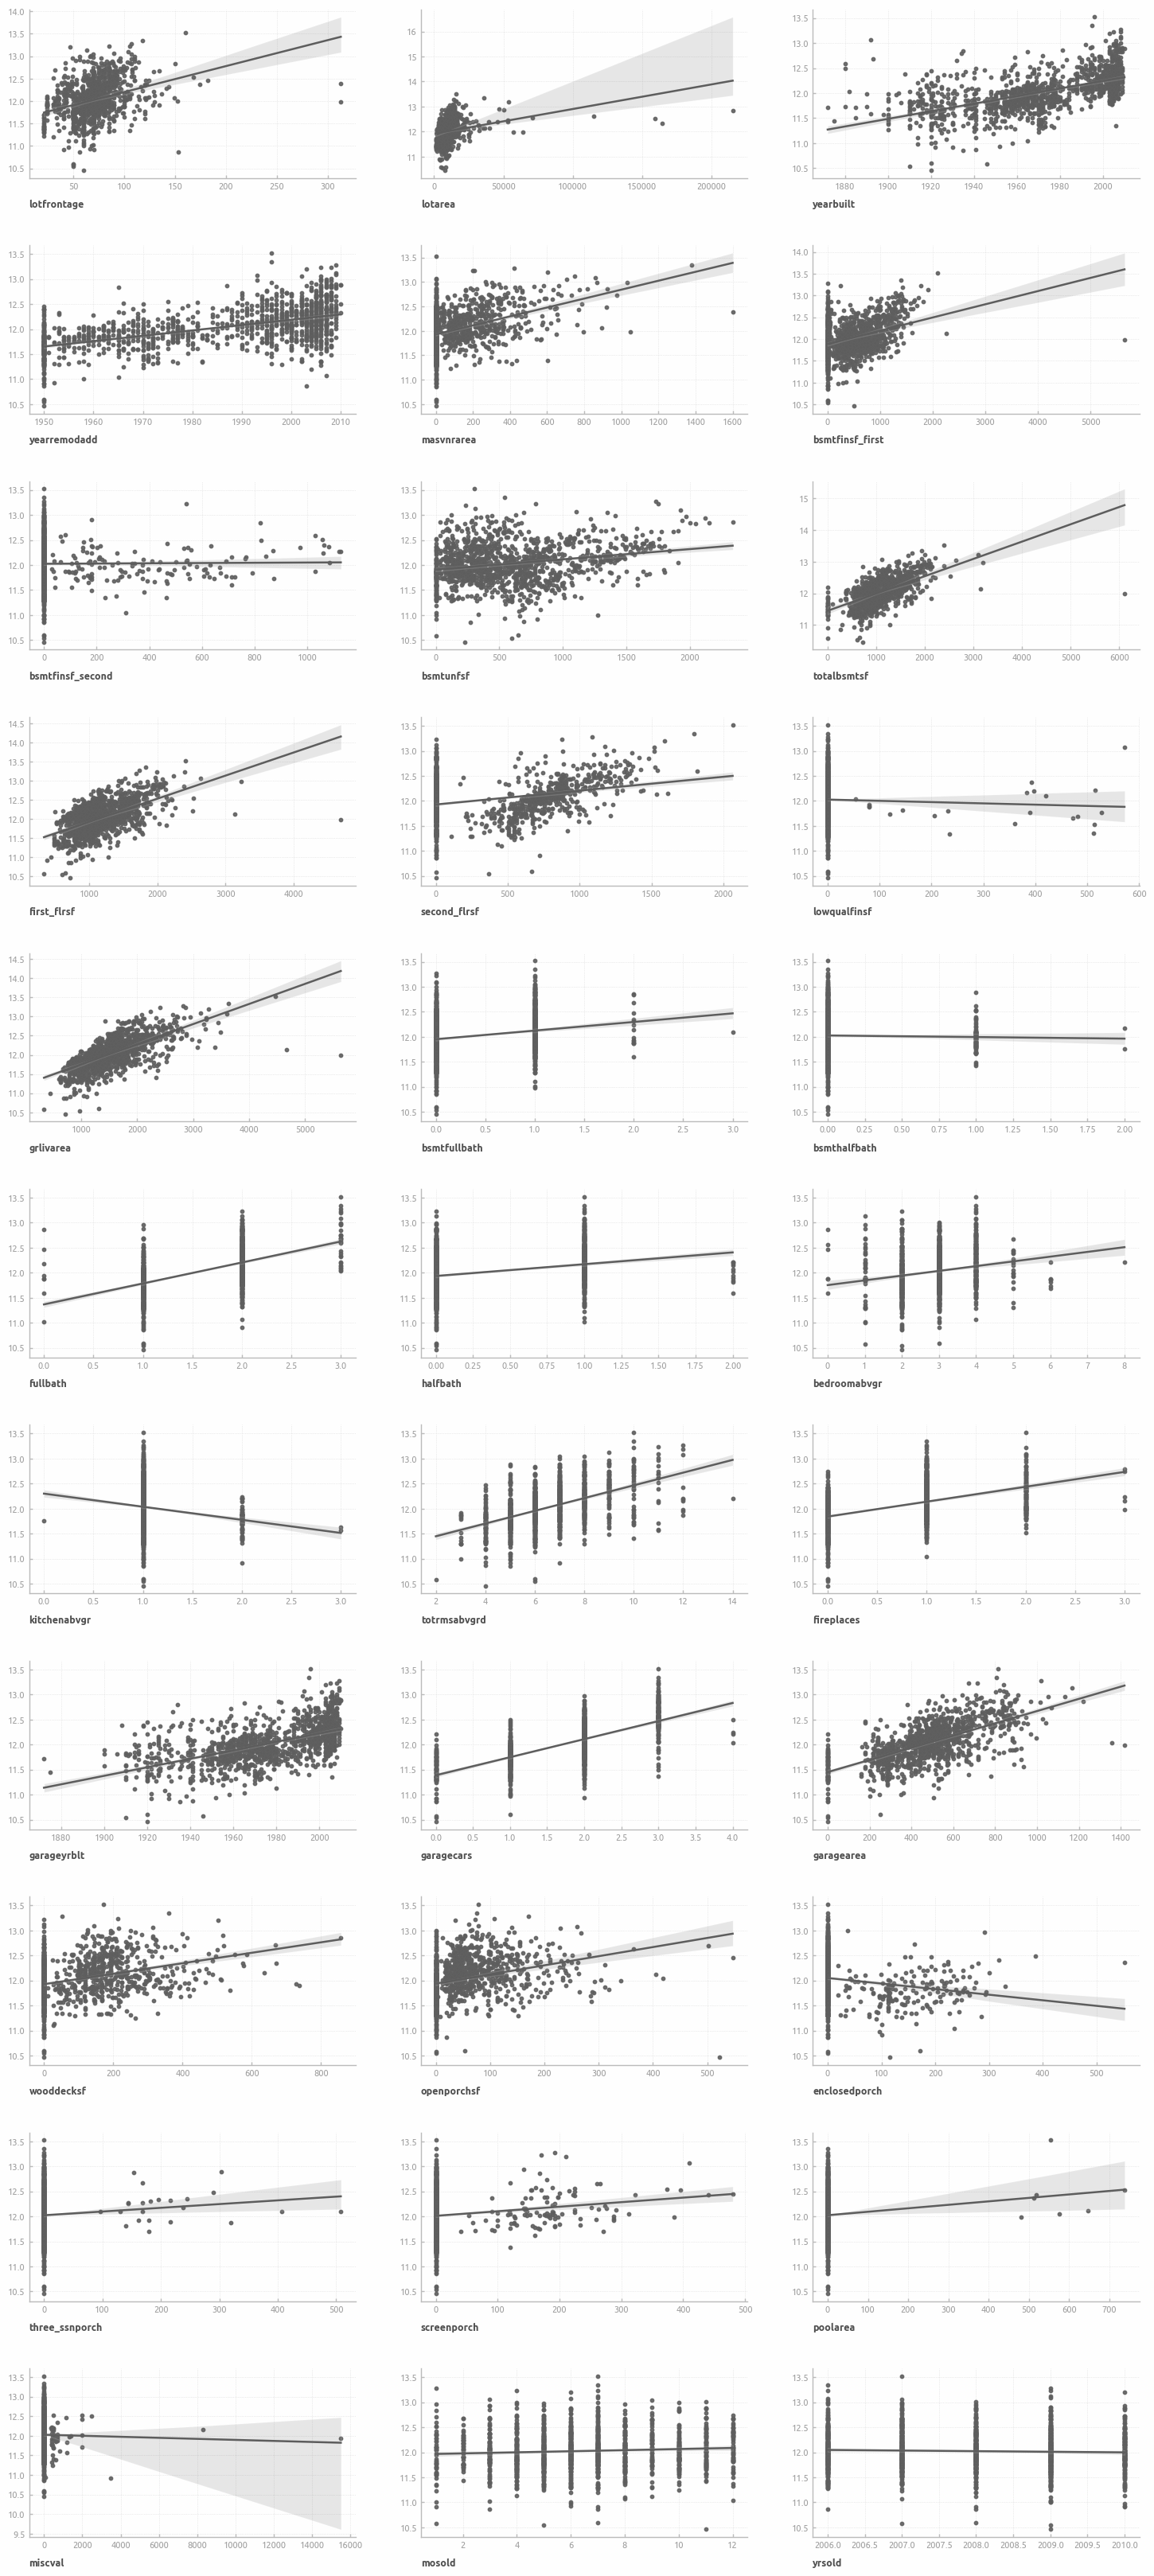

In [10]:
f = plot_gridplot(
    data=train,
    features=numeric,
    target=target,
    kind='reg',
    ncols=3,
    markersize=10,
    hscale=1,
    pscale=1.5
)

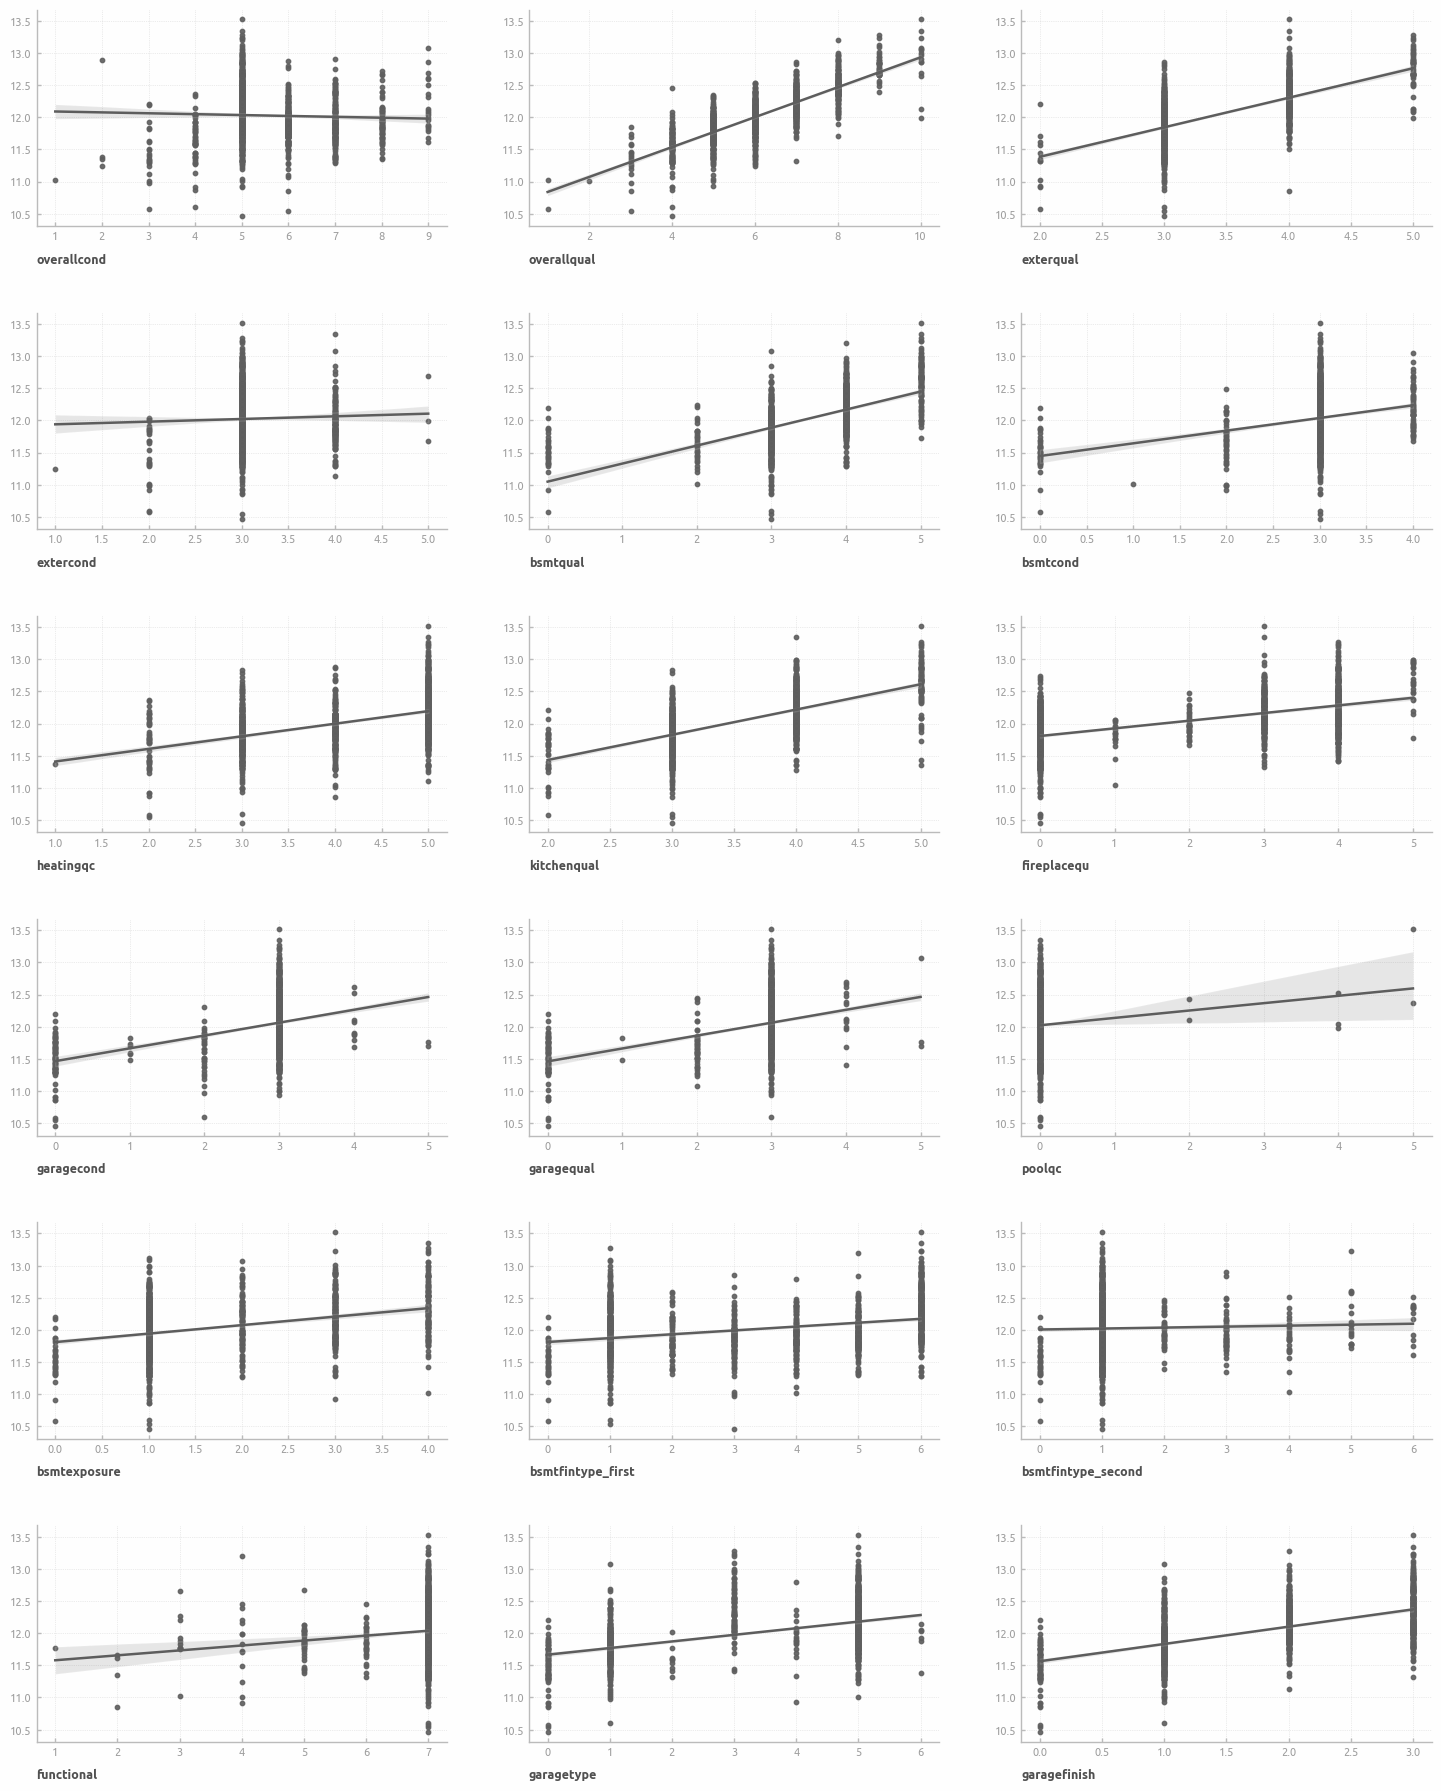

In [11]:
f = plot_gridplot(
    data=train,
    features=ordinal,
    target=target,
    kind='reg',
    markersize=10,
    ncols=3,
    hscale=1,
    pscale=1.5
)

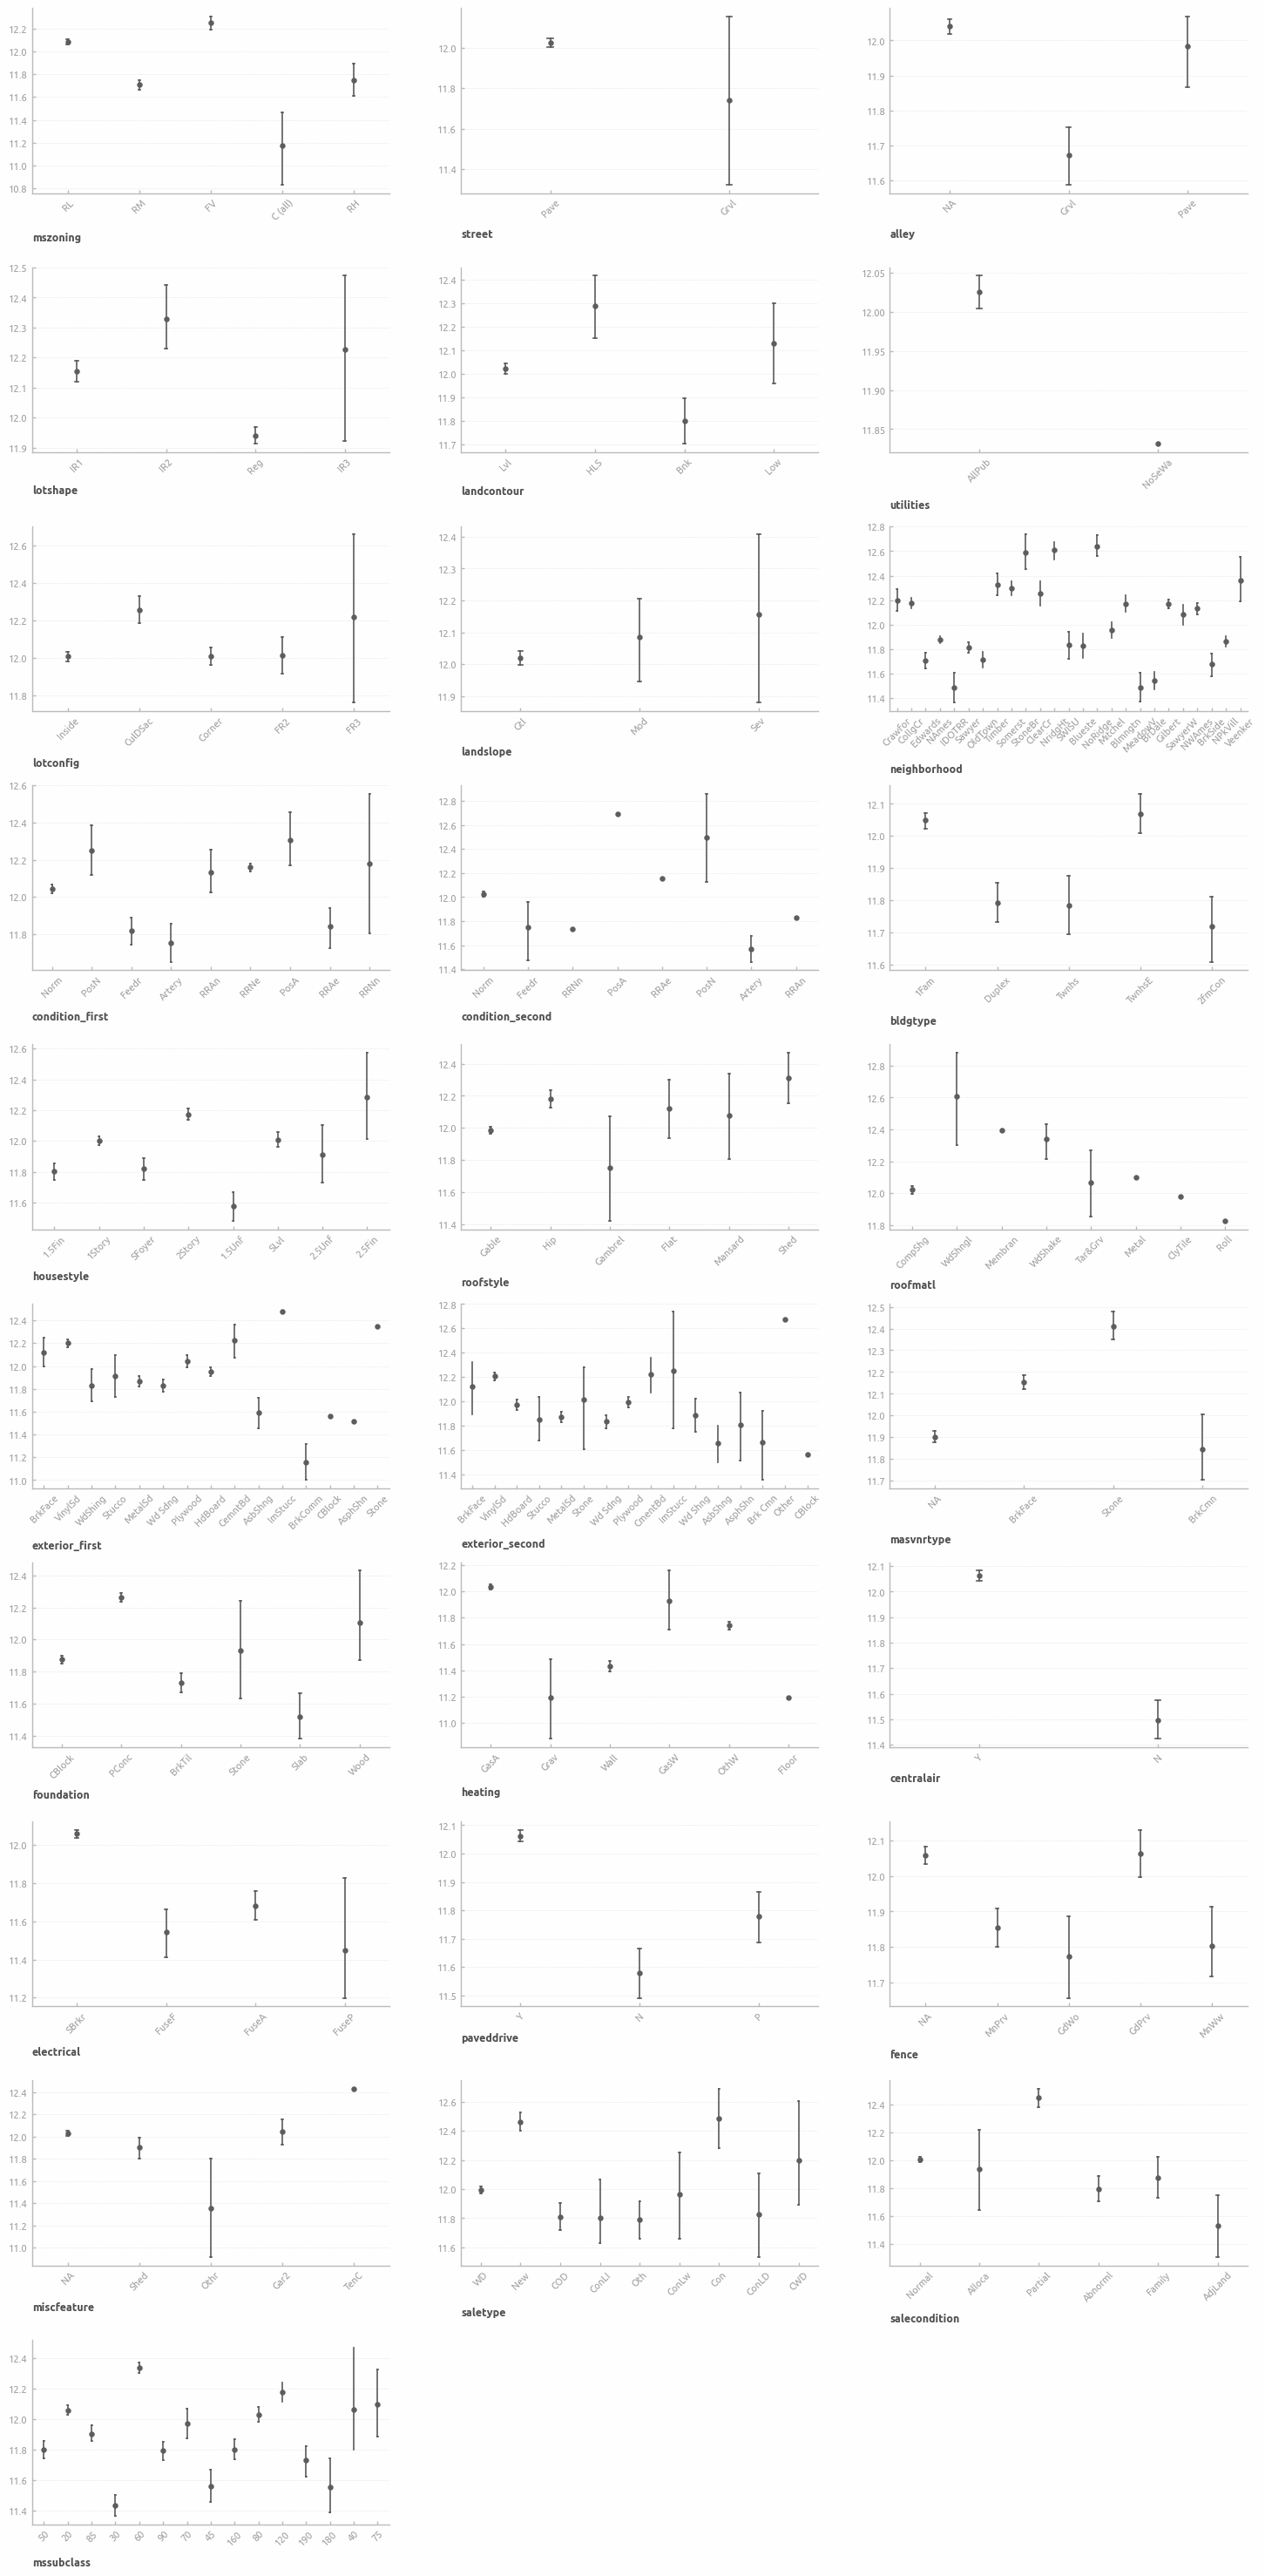

In [12]:
f = plot_gridplot(
    data=train,
    features=categorical,
    target=target,
    kind='point',
    markersize=3,
    ncols=3,
    hscale=1,
    pscale=1.5
)

## Variables Research

In [13]:
outliers_idxs = []

### 'lotfrontage'

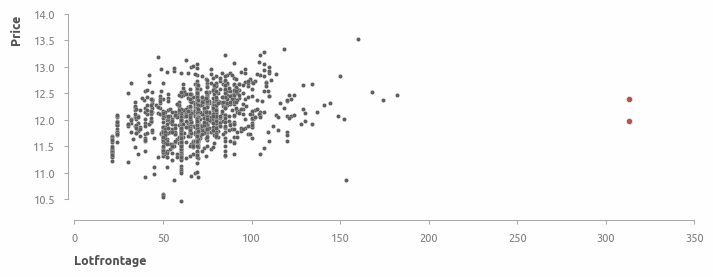

Images 'lotfrontage.png' and 'lotfrontage.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [14]:
fig = plt.figure(figsize=(8, 2.5))

sns.scatterplot(
    data=train,
    x='lotfrontage',
    y=target,
    **scatter,
)
sns.scatterplot(
    data=train.loc[train['lotfrontage']>250, ['lotfrontage', target]],
    x='lotfrontage',
    y=target,
    s=20,
    color=palette[1]
)
# plt.title('Street connected to property vs Price')
plt.xlabel('Lotfrontage')
plt.ylabel('Price')
axis_rstyle(
    xticks=[0, 350, 50],
    yticks=[10.5, 14.0, 0.5],
    # xlim=[0, 350],
    grid=False
)
plt.show()

savefig('lotfrontage', save_img)

In [15]:
train[train['lotfrontage'] > 250]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,4,NA,NA,0,1,2008,New,Partial,11.982929
934,935,20,RL,313.0,27650,Pave,NA,IR2,HLS,AllPub,...,0,0,NA,NA,0,11,2008,WD,Normal,12.396693


In [16]:
outliers_idxs.extend([934, 1298])

### 'lotarea'

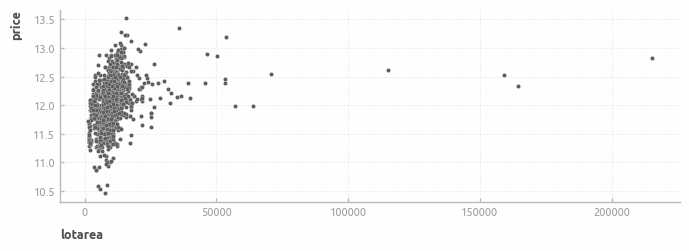

In [17]:
sns.scatterplot(
    data=train,
    x='lotarea',
    y=target,
    **scatter
);

Images 'landcontour.png' and 'landcontour.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


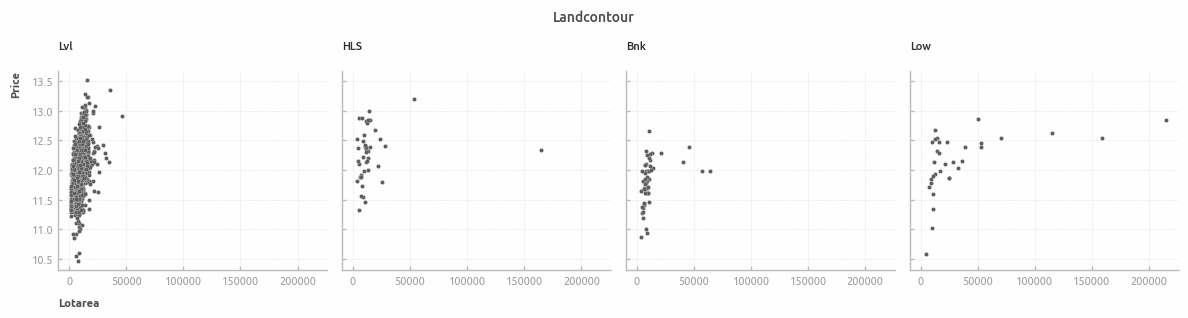

In [18]:
titles = train['landcontour'].unique().tolist()
titles_len = len(titles)
# figure
fig = sns.FacetGrid(train, col='landcontour')
fig.fig.set_tight_layout(True)
fig.map(sns.scatterplot, 'lotarea', target, **scatter);
# figure title
fig.fig.suptitle('Landcontour', y=1.05, fontsize=10)
# plots title
for ax, title_ in zip(fig.axes.flatten(), titles):
    ax.set_title(title_, fontsize=8)
# xlabels
for i in range(1, titles_len):
    fig.axes[0, i].set_xlabel(None)
fig.axes[0, 0].set_xlabel(str.capitalize('lotarea'), fontsize=8)
# ylabels
fig.axes[0, 0].set_ylabel(str.capitalize('price'), fontsize=8)

# save
savefig('landcontour', save_img)

In [19]:
train[(train['lotarea'] > 40000) & (train['landcontour'] == 'HLS')]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
335,336,190,RL,69.0,164660,Grvl,NA,IR1,HLS,AllPub,...,0,0,NA,Shed,700,8,2008,WD,Normal,12.341259
769,770,60,RL,47.0,53504,Pave,NA,IR2,HLS,AllPub,...,0,0,NA,NA,0,6,2010,WD,Normal,13.195614


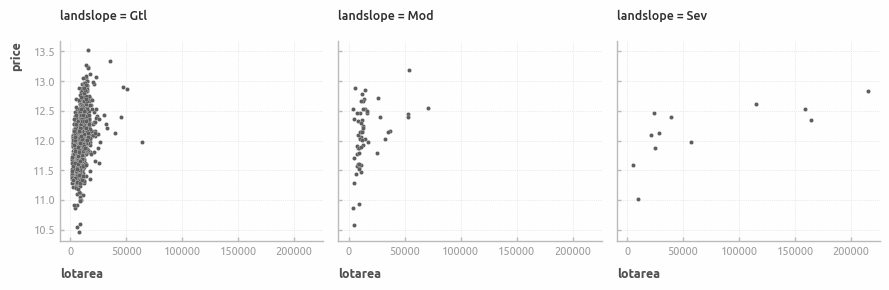

In [20]:
g = sns.FacetGrid(train, col='landslope')
g.fig.set_tight_layout(True)
g.map(sns.scatterplot, 'lotarea', target, **scatter);

### 'bsmtfinsf_first'

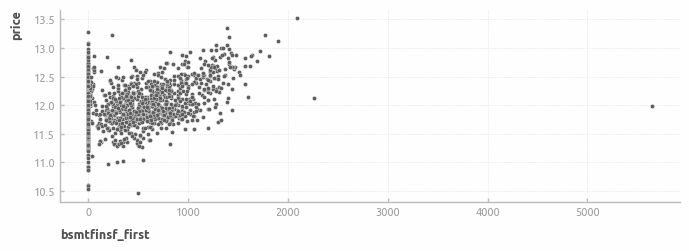

In [21]:
sns.scatterplot(
    data=train,
    x='bsmtfinsf_first',
    y=target
);

In [22]:
train[train['bsmtfinsf_first'] > 2200]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
523,524,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,...,0,0,NA,NA,0,10,2007,New,Partial,12.126759
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,4,NA,NA,0,1,2008,New,Partial,11.982929


In [23]:
train.loc[train['bsmtfinsf_first'] > 2200, 'overallqual']

523     10
1298    10
Name: overallqual, dtype: int64

In [24]:
outliers_idxs.extend([523, 1298])

### 'totalbsmtsf'

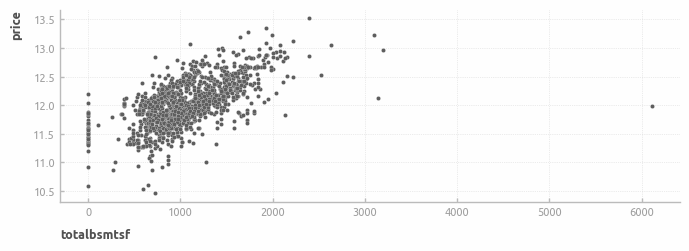

In [25]:
sns.scatterplot(
    data=train,
    x='totalbsmtsf',
    y=target,
    **scatter
);

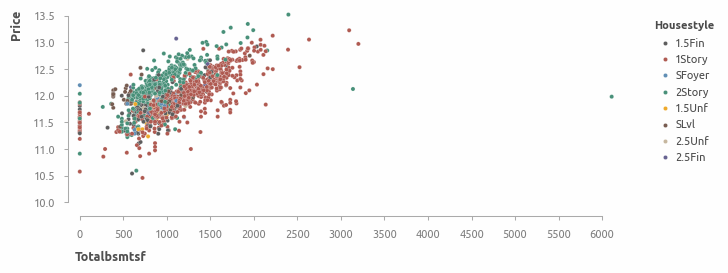

Images 'housestyle.png' and 'housestyle.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [26]:
fig = plt.figure(figsize=(7, 2.5))
sns.scatterplot(
    data=train,
    x='totalbsmtsf',
    y=target,
    hue='housestyle',
    **scatter
);
# legend
legend_ = plt.legend(
    title='Housestyle',
    **legend_mid(textpad=-0.1, bbox_to_anchor=(1.05, 1)))
legend_.set_title('Housestyle', prop={'size':8, 'weight':'bold'})
legend_._legend_box.sep = 5
# plt.title('Basement square vs Price')
plt.xlabel('Totalbsmtsf')
plt.ylabel('Price')
axis_rstyle(
    xticks=[0, 6000, 500],
    yticks=[10, 13.5, 0.5],
    grid=False
)
plt.show()

savefig('housestyle', save_img)

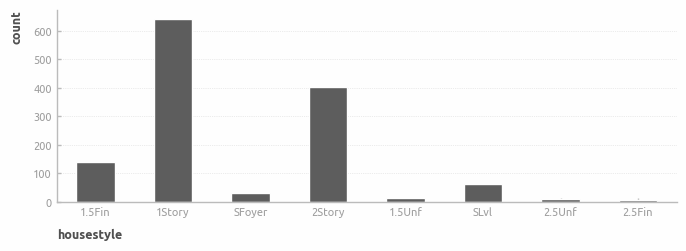

In [27]:
sns.countplot(
    data=train,
    x='housestyle',
    width=0.5,
    color=palette[0]
);

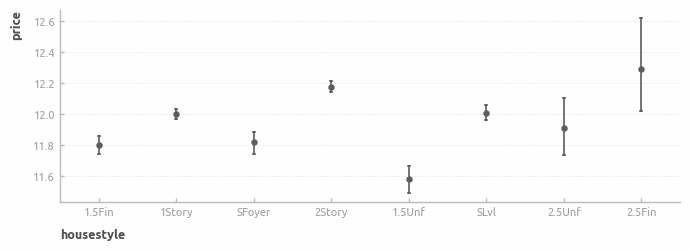

In [28]:
sns.pointplot(
    x=train['housestyle'],
    y=train[target],
    order=[
        '1.5Fin', '1Story', 'SFoyer',
        '2Story', '1.5Unf', 'SLvl',
        '2.5Unf', '2.5Fin' 
    ],
    **point
);

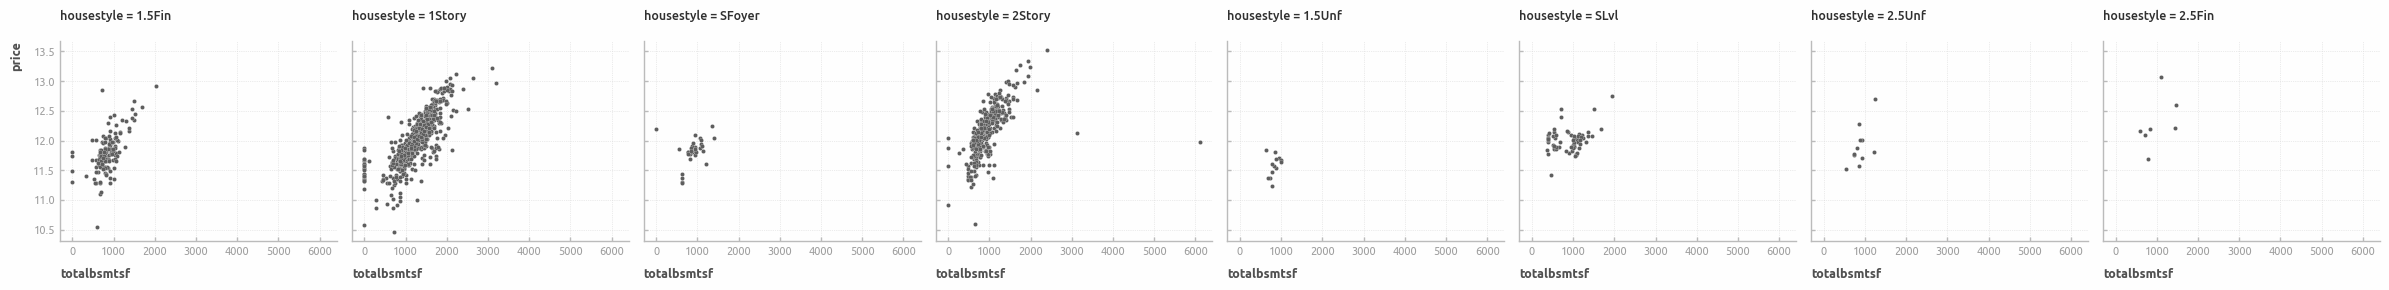

In [29]:
g = sns.FacetGrid(train, col='housestyle')
g.fig.set_tight_layout(True)
g.map(sns.scatterplot, 'totalbsmtsf', target, **scatter);

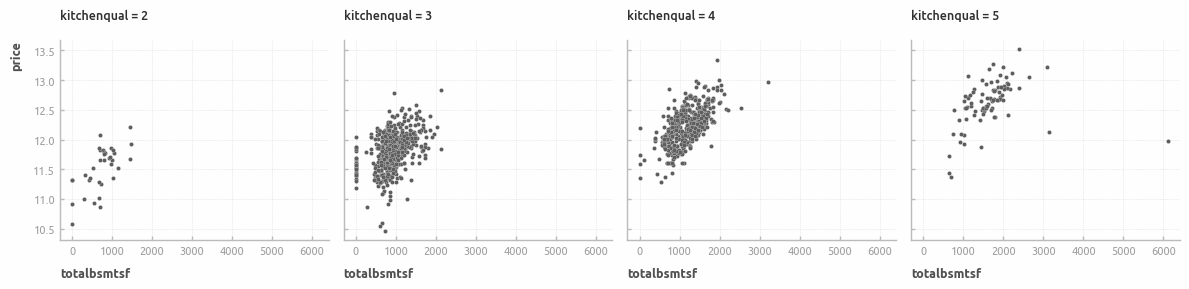

In [30]:
g = sns.FacetGrid(train, col='kitchenqual')
g.fig.set_tight_layout(True)
g.map(sns.scatterplot, 'totalbsmtsf', target, **scatter);

### 'first_flrsf'

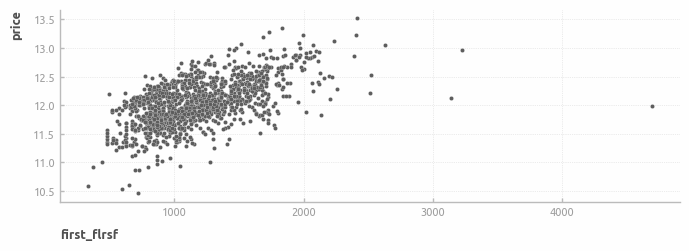

In [31]:
sns.scatterplot(
    data=train,
    x='first_flrsf',
    y=target,
    **scatter
);

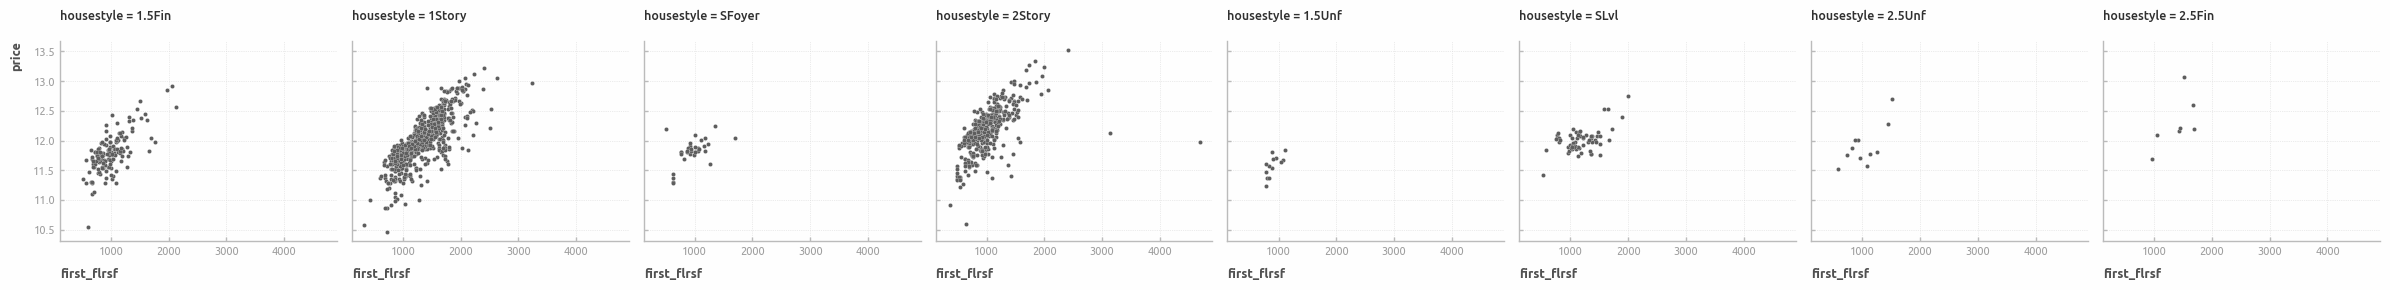

In [32]:
g = sns.FacetGrid(train, col='housestyle')
g.fig.set_tight_layout(True)
g.map(sns.scatterplot, 'first_flrsf', target, **scatter);

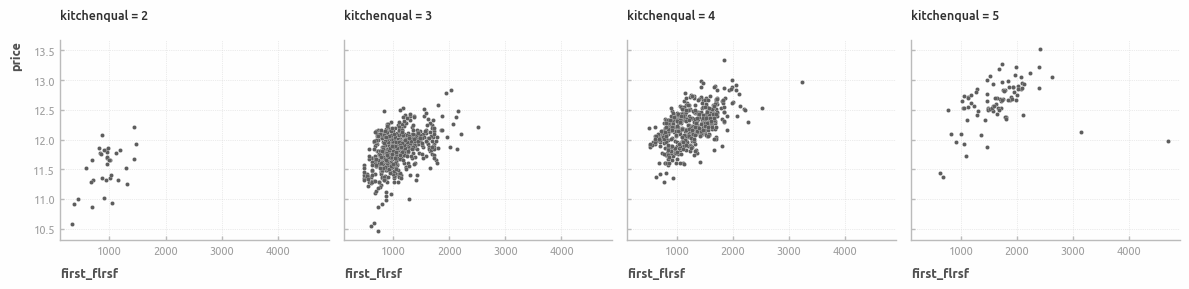

In [33]:
g = sns.FacetGrid(train, col='kitchenqual')
g.fig.set_tight_layout(True)
g.map(sns.scatterplot, 'first_flrsf', target, **scatter);

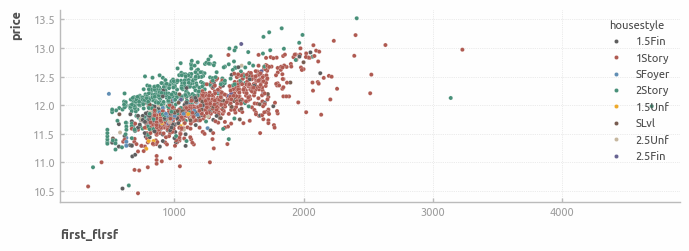

In [34]:
f = plt.figure()
sns.scatterplot(
    data=train,
    x='first_flrsf',
    y=target,
    hue='housestyle',
    **scatter
);

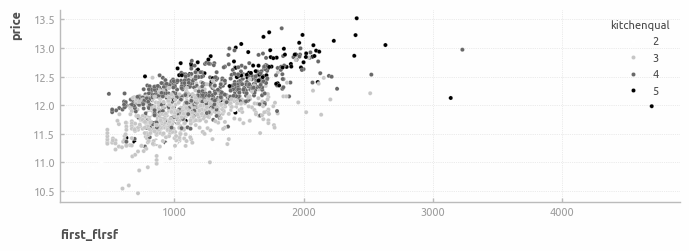

In [35]:
sns.scatterplot(
    data=train,
    x='first_flrsf',
    y=target,
    hue='kitchenqual',
    palette='Greys',
    **scatter
);

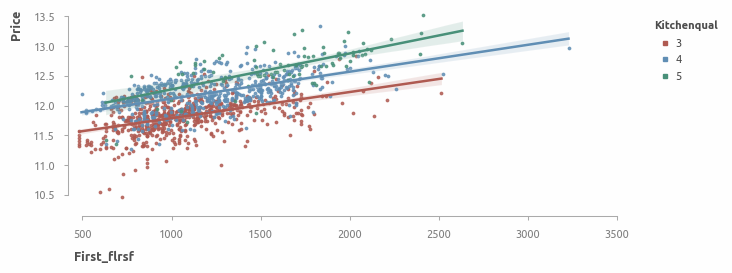

Images 'kitchenqual_vs_price.png' and 'kitchenqual_vs_price.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [36]:
# plot data without outliers
handles = []
fig = plt.figure(figsize=(7, 2.5))
for i in [3, 4, 5]:
    data_plot_cond = ((train['kitchenqual']==i) &
                      (~train.index.isin(outliers_idxs)))
    data_plot_kitchenqual = train[data_plot_cond]
    sns.regplot(
        data=data_plot_kitchenqual,
        x='first_flrsf',
        y=target,
        label=str(i),
        color=palette[i-2],
        scatter_kws={'s': 3},
        # line_kws={'linewidth': 1.2}
    );
    handle = mlines.Line2D(
        [], [], color=palette[i-2], marker='s',
        linestyle='None', markersize=3, label=i)
    handles.append(handle)
# legend
legend_ = plt.legend(
    handles=handles,
    **legend_mid(textpad=-0.1, bbox_to_anchor=(1.05, 1)))
legend_.set_title('Kitchenqual', prop={'size':8, 'weight':'bold'})
legend_._legend_box.sep = 5
# title and labels
# plt.title('First floor area vs Price')
plt.xlabel('First_flrsf')
plt.ylabel('Price')
axis_rstyle(
    xticks=[500, 3500, 500],
    yticks=[10.5, 13.5, 0.5],
    grid=False
)
plt.show()

savefig('kitchenqual_vs_price', save_img, transparent=True)

In [37]:
train['kitchenqual'].value_counts()

kitchenqual
3    663
4    529
5     87
2     35
Name: count, dtype: int64

### 'grlivarea'

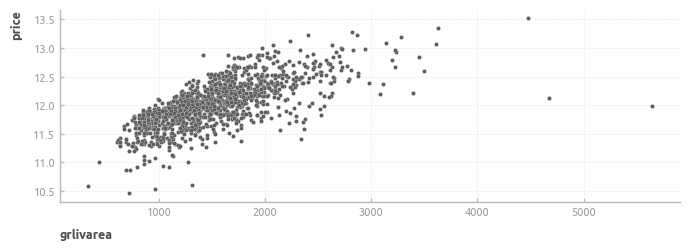

In [38]:
sns.scatterplot(
    data=train,
    x='grlivarea',
    y=target,
    **scatter
);

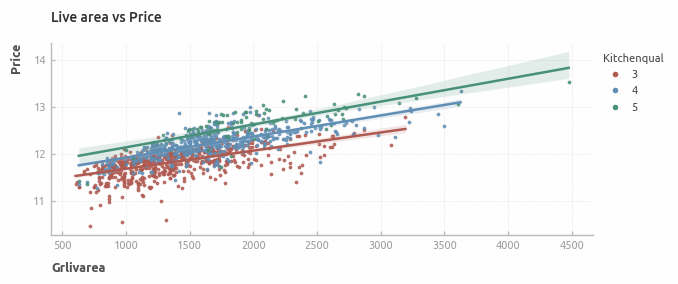

In [39]:
# plot data without outliers
handles = []
fig = plt.figure(figsize=(7, 2.5))
for i in [3, 4, 5]:
    data_plot_cond = ((train['kitchenqual']==i) &
                      (~train.index.isin(outliers_idxs)))
    data_plot_kitchenqual = train[data_plot_cond]
    sns.regplot(
        data=data_plot_kitchenqual,
        x='grlivarea',
        y=target,
        label=str(i),
        color=palette[i-2],
        scatter_kws={'s': 3},
        # line_kws={'linewidth': 1.2}
    );
    handle = mlines.Line2D(
        [], [], color=palette[i-2], marker='o',
        linestyle='None', markersize=3, label=i)
    handles.append(handle)
# legend
plt.legend(handles=handles, title='Kitchenqual', **legend_mid())
# title and labels
plt.title('Live area vs Price')
plt.xlabel('Grlivarea')
plt.ylabel('Price')
plt.show()

In [40]:
train[['grlivarea', 'kitchenqual']].groupby('kitchenqual').describe()

grlivarea                                                          \
                count         mean         std    min     25%     50%     75%   
kitchenqual                                                                     
2                35.0  1237.742857  521.114718  334.0   948.0  1152.0  1499.5   
3               663.0  1348.058824  422.182022  605.0  1040.0  1269.0  1597.5   
4               529.0  1659.066163  469.381655  630.0  1358.0  1616.0  1915.0   
5                87.0  2097.367816  749.164901  630.0  1705.5  1944.0  2353.0   

                     
                max  
kitchenqual          
2            3395.0  
3            3194.0  
4            3627.0  
5            5642.0

In [41]:
train[['kitchenqual', 'price']].groupby('kitchenqual').describe()

price                                                        \
             count       mean       std        min        25%        50%   
kitchenqual                                                                
2             35.0  11.515850  0.371921  10.578980  11.314475  11.652687   
3            663.0  11.819043  0.284622  10.460242  11.669929  11.842229   
4            529.0  12.218759  0.291711  11.277203  12.054668  12.211060   
5             87.0  12.626011  0.380080  11.362103  12.491064  12.669807   

                                   
                   75%        max  
kitchenqual                        
2            11.786697  12.206073  
3            12.001199  12.834681  
4            12.388394  13.345507  
5            12.859659  13.521139

In [42]:
test_normality(train.loc[train['kitchenqual'] == 3, 'price'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),3.1107,Not normal
2,Shapiro-Wilk,0.0000,Not normal
3,Jarque-Bera,0.0000,Not normal
4,D’Agostino-Pearson,0.0000,Not normal


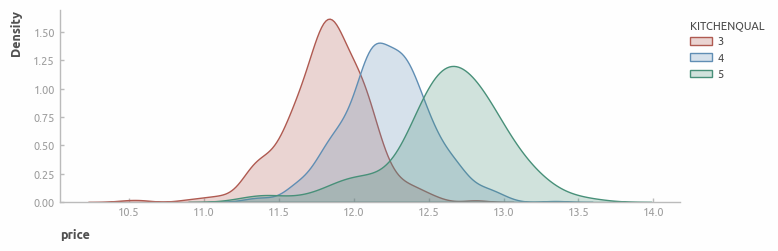

In [43]:
sns.kdeplot(
    train.loc[train['kitchenqual'] == 3, 'price'],
    fill=True, color=palette[1], label='3')
sns.kdeplot(
    train.loc[train['kitchenqual'] == 4, 'price'],
    fill=True, color=palette[2], label='4')
sns.kdeplot(
    train.loc[train['kitchenqual'] == 5, 'price'], 
    fill=True, color=palette[3], label='5')

plt.legend(title='kitchenqual'.upper(), **legend_mid())
plt.grid(False)
plt.show()

### 'garagearea'

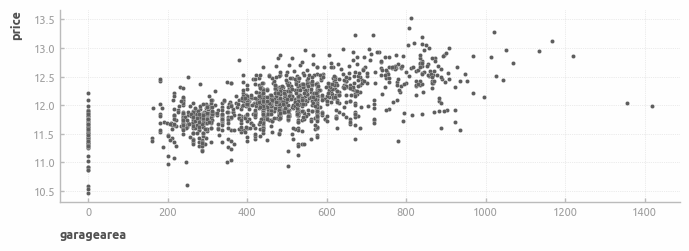

In [44]:
sns.scatterplot(
    data=train,
    x='garagearea',
    y=target,
    **scatter
);

In [45]:
train[train['garagearea'] >1300]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
1190,1191,190,RL,69.0,32463,Pave,NA,Reg,Low,AllPub,...,0,0,NA,NA,0,3,2007,WD,Normal,12.031719
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,4,NA,NA,0,1,2008,New,Partial,11.982929


In [46]:
outliers_idxs.extend([1190, 1298])

### 'miscval'

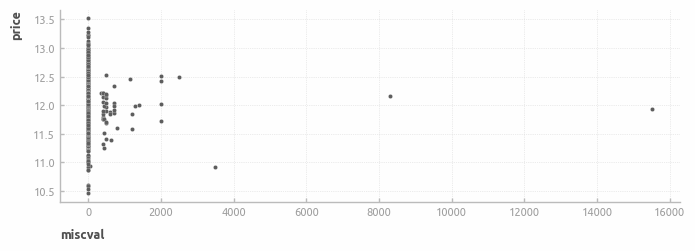

In [47]:
sns.scatterplot(
    data=train,
    x='miscval',
    y=target,
    **scatter
);

In [48]:
train[train['miscval'] >3000]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
346,347,20,RL,69.0,12772,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,Gar2,15500,4,2007,WD,Normal,11.928341
705,706,190,RM,70.0,5600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,Othr,3500,7,2010,WD,Normal,10.915088
1230,1231,90,RL,69.0,18890,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,Gar2,8300,8,2007,WD,Normal,12.154779


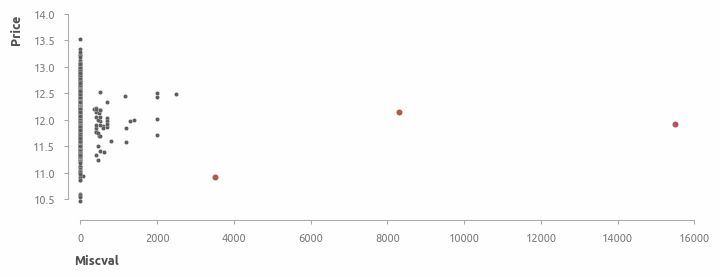

Images 'miscval.png' and 'miscval.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [49]:
fig = plt.figure(figsize=(8, 2.5))
sns.scatterplot(
    data=train,
    x='miscval',
    y=target,
    color=palette[0],
    **scatter
);
sns.scatterplot(
    data=train.loc[[346, 705, 1230]],
    x='miscval',
    y=target,
    color=palette[1],
    s=20,
    **scatter
);
plt.xlabel('Miscval')
plt.ylabel('Price')
axis_rstyle(
    xticks=[0, 16000, 2000],
    yticks=[10.5, 14.0, 0.5],
    # xlim=[-300, 16000],
    # ylim=[10.3, 14.0]
)
plt.show()

savefig('miscval', save_img, transparent=True)

In [50]:
outliers_idxs.extend([346, 705, 1230])

### 'masvnrarea'

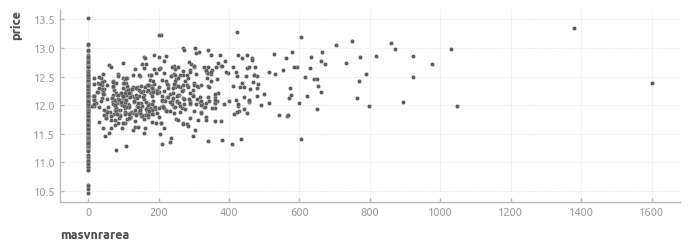

In [51]:
sns.scatterplot(data=train, x='masvnrarea', y=target, **scatter);

In [52]:
train[train['masvnrarea'] > 1400]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,0,NA,NA,0,6,2007,WD,Normal,12.384219


In [53]:
outliers_idxs.extend([297])

## Outliers suspect list

In [54]:
outliers_idxs

[934, 1298, 523, 1298, 1190, 1298, 346, 705, 1230, 297]

In [55]:
outliers_idxs = list(set(outliers_idxs))

In [56]:
outliers_idxs

[705, 1190, 934, 297, 523, 1230, 1298, 346]

## Grouping Features

In [57]:
features_qual = [
    'overallqual', 'exterqual', 'garagequal', 'kitchenqual',
    'bsmtqual', 'bsmtfintype_first', 'bsmtfintype_second',
    'heatingqc', 'fireplacequ', 'poolqc', 'fence'
]

In [58]:
features_garage = [
    'garageyrblt', 'garagecars', 'garagearea',
    'garagetype', 'garagefinish', 'garagequal', 'garagecond'
]

In [59]:
features_bsmt = [
    'bsmtfinsf_first', 'bsmtfinsf_second', 'bsmtunfsf',
    'totalbsmtsf', 'bsmtfullbath', 'bsmthalfbath', 'bsmtqual',
    'bsmtcond', 'bsmtexposure', 'bsmtfintype_first', 'bsmtfintype_second'
]

In [60]:
features_square = [
    'bsmtfinsf_first', 'bsmtfinsf_second', 'bsmtunfsf', 'totalbsmtsf',
    'first_flrsf', 'second_flrsf', 'grlivarea', 'lowqualfinsf',
    'masvnrarea', 'wooddecksf', 'openporchsf', 'enclosedporch',
    'three_ssnporch', 'screenporch', 'poolarea'
]

In [61]:
features_rooms = [
    'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'bsmtfullbath',
    'bsmthalfbath', 'fullbath', 'halfbath'
]

In [62]:
features_year = [
    'garageyrblt', 'mosold', 'yrsold', 'yearbuilt', 'yearremodadd'
]

In [63]:
features_lot = [
    'lotfrontage', 'lotarea', 'lotshape',
    'lotconfig', 'landcontour', 'landslope'
]

In [64]:
features_const = [
    'roofmatl', 'exterior_first', 'exterior_second',
    'masvnrtype', 'foundation'
]

In [65]:
features_type = [
    'bldgtype', 'housestyle', 'roofstyle'
]

In [66]:
features_cond = [
    'overallcond', 'extercond'
]

In [67]:
features_serv = [
    'fireplaces', 'utilities', 'heating',
    'centralair', 'electrical', 'functional',
    'miscfeature', 'miscval'
]

In [68]:
features_area = [
   'street', 'alley', 'neighborhood', 'paveddrive', 'mszoning',
    'condition_first', 'condition_second'
]

In [69]:
features_org = [
     'mssubclass', 'salecondition', 'saletype'
]

In [70]:
len(set(features_qual + features_garage + features_bsmt
        + features_square + features_rooms + features_year
        + features_lot + features_const + features_type
        + features_cond + features_serv + features_area
        + features_org))

79

In [71]:
len(features)

79

In [72]:
groups_dict = {
    'features_qual': features_qual,
    'features_garage': features_garage,
    'features_bsmt': features_bsmt,
    'features_square': features_square,
    'features_rooms': features_rooms,
    'features_year': features_year,
    'features_lot': features_lot,
    'features_const': features_const,
    'features_type': features_type,
    'features_cond': features_cond,
    'features_serv': features_serv,
    'features_area': features_area
}

In [73]:
len(groups_dict)

12

## Data Cleaning

### Discrepancy

#### Garage Features

**Result**: All NA values match each other

In [74]:
train_garage = train[features_garage].copy()

In [75]:
train_garage.head()

,garageyrblt,garagecars,garagearea,garagetype,garagefinish,garagequal,garagecond
907,1936.0,1,180,5,3,2,3
782,2001.0,2,605,5,2,3,3
952,1974.0,1,396,1,3,3,3
620,1914.0,0,0,0,0,0,0
669,1922.0,1,252,1,1,3,2


In [76]:
print(
    len(train[train['garagearea'] == 0]),
    len(train[train['garagecars'] == 0]),
    len(train[train['garagecond'] == 'NA']),
    len(train[train['garagefinish'] == 'NA']),
    len(train[train['garagequal'] == 'NA']),
    len(train[train['garagetype'] == 'NA'])
)

73 73 0 0 0 0


In [77]:
loc_r = ((train['garagecars'] == 0)
         | (train['garagearea'] == 0)
         | (train['garagecond'] == 'NA')
         | (train['garagefinish'] == 'NA')
         | (train['garagequal'] == 'NA')
         | (train['garagetype'] == 'NA'))

check_na_vars = [
    'garagecars', 'garagearea', 'garagecond',
    'garagefinish', 'garagequal', 'garagetype'
]
train_garage_na = train.loc[loc_r, check_na_vars]

In [78]:
train_garage_na.head()

,garagecars,garagearea,garagecond,garagefinish,garagequal,garagetype
620,0,0,0,0,0,0
1450,0,0,0,0,0,0
528,0,0,0,0,0,0
843,0,0,0,0,0,0
163,0,0,0,0,0,0


In [79]:
values_dict = {0: 'NA'}

for feature in check_na_vars:
    loc = (train_garage_na[feature] == 0, feature)
    train_garage_na.loc[loc] = train_garage_na.loc[loc].map(values_dict)

In [80]:
train_garage_na.head()

,garagecars,garagearea,garagecond,garagefinish,garagequal,garagetype
620,NA,NA,NA,NA,NA,NA
1450,NA,NA,NA,NA,NA,NA
528,NA,NA,NA,NA,NA,NA
843,NA,NA,NA,NA,NA,NA
163,NA,NA,NA,NA,NA,NA


In [81]:
check_columns_match(data=train_garage_na)

All values matched


#### Basement Features

**Result**:All NA values match each other

In [82]:
train_bsmt = train[features_bsmt].copy()

In [83]:
train_bsmt.head()

,bsmtfinsf_first,bsmtfinsf_second,bsmtunfsf,totalbsmtsf,bsmtfullbath,bsmthalfbath,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype_first,bsmtfintype_second
907,223,0,794,1017,0,0,4,3,1,3,1
782,0,0,1413,1413,0,0,4,3,1,1,1
952,660,0,108,768,0,1,4,3,3,6,1
620,41,0,823,864,1,0,3,3,1,4,1
669,0,0,700,700,0,0,2,3,1,1,1


In [84]:
train_bsmt['bsmnt_check'] = (train['totalbsmtsf']
                             - train['bsmtunfsf']
                             - train['bsmtfinsf_second']
                             - train['bsmtfinsf_first'])

In [85]:
train_bsmt['bsmnt_check'].any()

False

#### Square Feet Features

**Result**: 
- Masvnarea: 7 elements mismatched **-->** Explore later
- Garageyrblt: 6 elements with garage built before house
- Values of other features match each other

In [86]:
train_square = train[features_square].copy()

In [87]:
train_square.head()

,bsmtfinsf_first,bsmtfinsf_second,bsmtunfsf,totalbsmtsf,first_flrsf,second_flrsf,grlivarea,lowqualfinsf,masvnrarea,wooddecksf,openporchsf,enclosedporch,three_ssnporch,screenporch,poolarea
907,223,0,794,1017,1020,1037,2057,0,0.0,0,0,0,0,322,0
782,0,0,1413,1413,1430,0,1430,0,0.0,0,33,0,0,0,0
952,660,0,108,768,768,0,768,0,0.0,192,0,0,0,0,0
620,41,0,823,864,864,0,864,0,0.0,0,0,100,0,0,0
669,0,0,700,700,1180,0,1180,0,0.0,0,0,67,0,0,0


##### Grlivarea

In [88]:
train_square['livarea_check'] = (train_square['grlivarea']
                                 - train_square['first_flrsf']
                                 - train_square['second_flrsf']
                                 - train_square['lowqualfinsf'])

In [89]:
train_square['livarea_check'].any()

False

##### Masvnarea

In [90]:
train_masvnr = train[['masvnrarea', 'masvnrtype']].copy()

In [91]:
cond1 = ((train_masvnr['masvnrtype'] == 'NA')
         & train_masvnr['masvnrarea'] != 0)
cond2 = ((train_masvnr['masvnrarea'] == 0)
         & (train_masvnr['masvnrtype'] != 'NA'))

loc_r = (cond1 | cond2)
train_masvnr_disc = train_masvnr.loc[loc_r, :]

In [92]:
train_masvnr_disc

,masvnrarea,masvnrtype
624,288.0,NA
1230,1.0,NA
1300,344.0,NA
688,0.0,BrkFace
773,1.0,NA
1334,312.0,NA
1241,0.0,Stone


In [93]:
idxs_masvnr_disc = train_masvnr_disc.index.to_list()

In [94]:
idxs_masvnr_disc

[624, 1230, 1300, 688, 773, 1334, 1241]

##### Poolarea

In [95]:
train_poolarea = train[['poolarea', 'poolqc']].copy()

In [96]:
train_poolarea.head(2)

,poolarea,poolqc
907,0,0
782,0,0


In [97]:
loc = ((train_poolarea['poolarea'] == 0)
       | (train_poolarea['poolqc'] == 'NA'))

train_poolarea_na = train_poolarea.loc[loc, :]

In [98]:
train_poolarea_na.head(2)

,poolarea,poolqc
907,0,0
782,0,0


In [99]:
loc = (train_poolarea_na['poolarea'] == 0, 'poolqc')
train_poolarea_na.loc[loc] = train_poolarea_na.loc[loc].map(values_dict)

In [100]:
train_poolarea_na.head(2)

,poolarea,poolqc
907,0,NA
782,0,NA


In [101]:
check_columns_match(data=train_poolarea_na)

,poolarea,poolqc
907,0,NA
782,0,NA
952,0,NA
620,0,NA
669,0,NA
...,...,...
1095,0,NA
1130,0,NA
1294,0,NA
860,0,NA


#### Year Features

**Result**: 6 element with 'garageyrblt' < 'yearbuilt'

In [102]:
train_year = train[features_year].copy()

In [103]:
train_year.head()

,garageyrblt,mosold,yrsold,yearbuilt,yearremodadd
907,1936.0,6,2006,1936,1987
782,2001.0,6,2009,2001,2002
952,1974.0,4,2009,1972,2003
620,1914.0,9,2008,1914,1950
669,1922.0,7,2006,1922,1950


In [104]:
train_year['mosold'].unique()

array([ 6,  4,  9,  7,  3,  1,  5, 10, 11,  8, 12,  2])

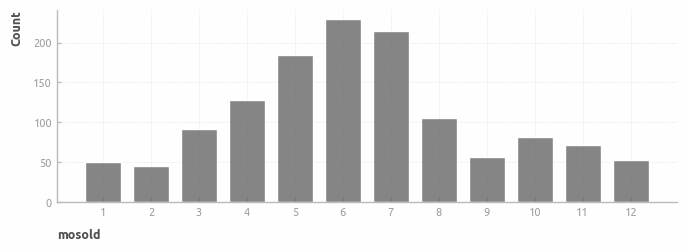

In [105]:
sns.histplot(data=train_year, x='mosold', shrink=0.75, discrete=True)
plt.xticks(np.sort(train_year['mosold'].unique()));

In [106]:
train_year['yrsold'].unique()

array([2006, 2009, 2008, 2007, 2010])

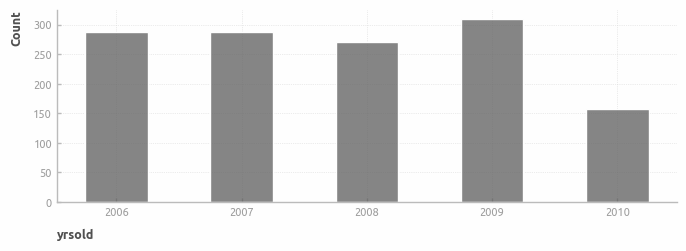

In [107]:
sns.histplot(data=train_year, x='yrsold', shrink=0.5, discrete=True)
plt.xticks(np.sort(train_year['yrsold'].unique()));

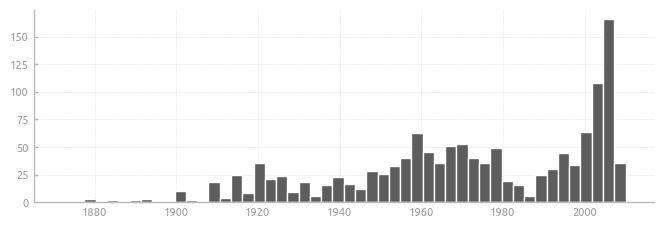

In [108]:
train_year['yearbuilt'].hist(bins=50);

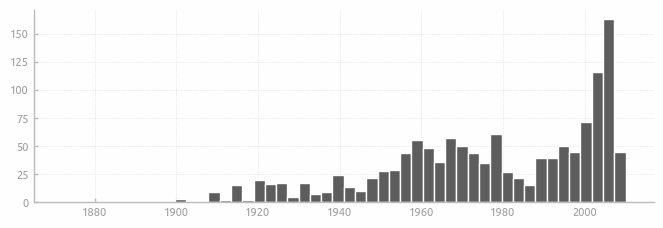

In [109]:
train_year['garageyrblt'].hist(bins=50);

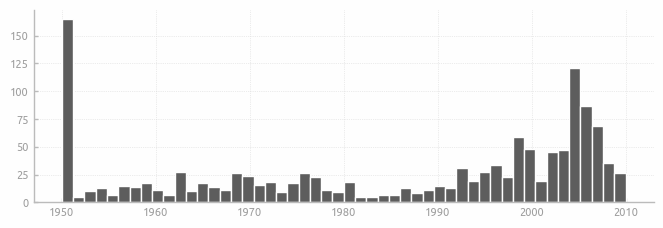

In [110]:
train_year['yearremodadd'].hist(bins=50);

In [111]:
(train_year['yearremodadd'] < train_year['yearbuilt']).any()

False

In [112]:
(train_year['yrsold'] < train_year['yearbuilt']).any()

False

In [113]:
(train_year['garageyrblt'] < train_year['yearbuilt']).any()

True

In [114]:
train_year[train_year['garageyrblt'] < train_year['yearbuilt']]

,garageyrblt,mosold,yrsold,yearbuilt,yearremodadd
324,1961.0,6,2010,1967,2007
1418,1962.0,8,2008,1963,1963
1376,1925.0,4,2008,1930,1950
1103,1954.0,7,2006,1959,1959
93,1900.0,11,2007,1910,1998
600,2003.0,6,2006,2005,2005


In [115]:
idxs_garageyrblt_disc = (train_year[train_year['garageyrblt']
                        < train_year['yearbuilt']]).index.to_list()

In [116]:
idxs_garageyrblt_disc

[324, 1418, 1376, 1103, 93, 600]

### Managing Discrepancy

**Result**:
1. Masvnarea: no visually relationships between unaccordance elements **-->** human mistake **-->** Manually Corrections.
2. Garageyrblt: sometimes people build garage before they build house **-->** no changes.

#### Masonry veneer 

In [117]:
idxs_masvnr_disc

[624, 1230, 1300, 688, 773, 1334, 1241]

In [118]:
train.loc[idxs_masvnr_disc, ['masvnrarea', 'masvnrtype', 'price']]

,masvnrarea,masvnrtype,price
624,288.0,NA,12.014609
1230,1.0,NA,12.154779
1300,344.0,NA,12.323856
688,0.0,BrkFace,12.879017
773,1.0,NA,11.648330
1334,312.0,NA,11.736069
1241,0.0,Stone,12.422506


In [119]:
train.loc[[624, 1230, 1300, 773, 1334], ['masvnrarea', 'masvnrtype', 'price']]

,masvnrarea,masvnrtype,price
624,288.0,NA,12.014609
1230,1.0,NA,12.154779
1300,344.0,NA,12.323856
773,1.0,NA,11.648330
1334,312.0,NA,11.736069


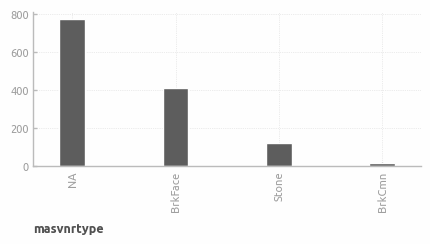

In [120]:
train['masvnrtype'].value_counts().plot(kind='bar', width=0.25, figsize=(5,2));

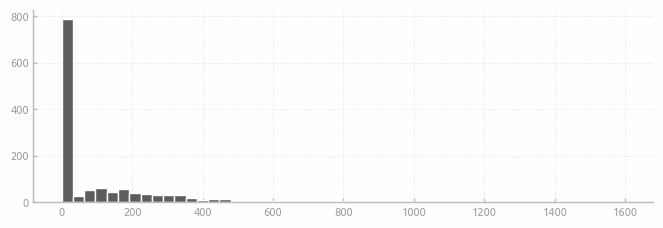

In [121]:
train['masvnrarea'].hist(bins=50);

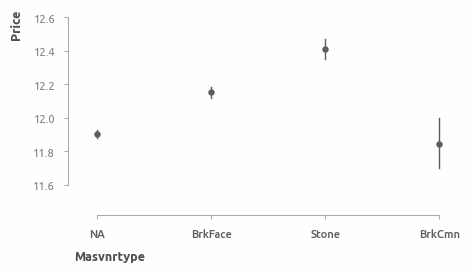

Images 'masvnrtype_price.png' and 'masvnrtype_price.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [122]:
fig = plt.figure(figsize=(5, 2.5))
sns.pointplot(
    data=train, x='masvnrtype', y=target, linestyle='none', markersize=3,
    err_kws={'lw': 1, 'zorder': 1}, zorder=10);
plt.xlabel('Masvnrtype')
plt.ylabel('Price')
axis_rstyle(
    xticks=[0, 3, 1],
    yticks=[11.6, 12.6, 0.2],
    xlim=[-0.2, 3.2],
    ylim=[11.5, 12.65])
plt.xticks(weight='medium', color=palette[0], size=8)
plt.show()

savefig('masvnrtype_price', save_img, dpi=100)

In [123]:
train['masvnrtype'].value_counts()

masvnrtype
NA         772
BrkFace    410
Stone      118
BrkCmn      14
Name: count, dtype: int64

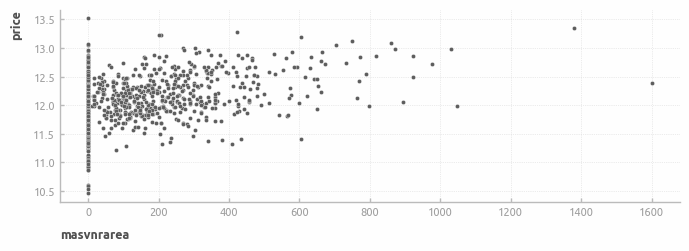

In [124]:
sns.scatterplot(data=train, x='masvnrarea', y=target);

##### IDXS 1230, 773

In [125]:
train.loc[[1230, 773], ['masvnrarea', 'masvnrtype', 'price']]

,masvnrarea,masvnrtype,price
1230,1.0,NA,12.154779
773,1.0,NA,11.648330


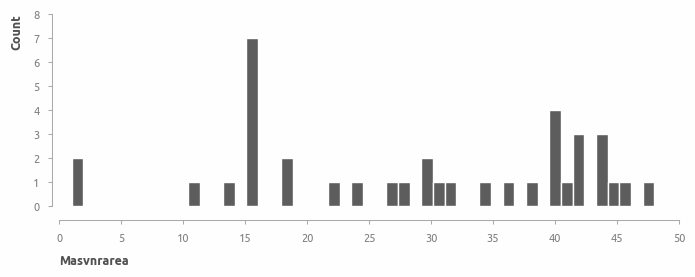

Images 'masvnrarea_minimal.png' and 'masvnrarea_minimal.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [126]:
loc_r = (train['masvnrarea'] < 50) & (train['masvnrarea'] > 0)
# train.loc[loc_r, 'masvnrarea'].hist(bins=50);

fig = plt.figure()

plt.hist(train.loc[loc_r, 'masvnrarea'], bins=50)
plt.xlabel('Masvnrarea')
plt.ylabel('Count')
plt.grid(False)
axis_rstyle(xticks=(0, 50, 5), yticks=(0, 8, 1))
plt.show()

savefig('masvnrarea_minimal', save_img)

In [127]:
train.loc[train.index.isin([773, 1230]), 'masvnrarea'] = 0

##### IDXS 688, 1241

In [128]:
train.loc[[688, 1241], ['masvnrarea', 'masvnrtype', 'price']]

,masvnrarea,masvnrtype,price
688,0.0,BrkFace,12.879017
1241,0.0,Stone,12.422506


In [129]:
stone_type_median = \
    train.loc[train['masvnrtype'] == 'Stone', 'masvnrarea'].median()

In [130]:
stone_type_median

200.0

In [131]:
train.loc[1241, 'masvnrarea'] = np.round(stone_type_median, 1)

In [132]:
brkface_type_median = \
    train.loc[train['masvnrtype'] == 'BrkFace', 'masvnrarea'].median()

In [133]:
brkface_type_median

196.0

In [134]:
train.loc[688, 'masvnrarea'] = np.round(brkface_type_median, 1)

##### IDXS 624, 1300, 1334

In [135]:
train.loc[[624, 1300, 1334], ['masvnrarea', 'masvnrtype', 'price']]

,masvnrarea,masvnrtype,price
624,288.0,NA,12.014609
1300,344.0,NA,12.323856
1334,312.0,NA,11.736069


In [136]:
train.loc[train.index.isin([624, 1334]), 'masvnrarea'] = 0

In [137]:
train.loc[train.index.isin([1300]), 'masvnrtype'] = 'Stone'

##### Results

In [138]:
train.loc[idxs_masvnr_disc, ['masvnrarea', 'masvnrtype', 'price']]

,masvnrarea,masvnrtype,price
624,0.0,NA,12.014609
1230,0.0,NA,12.154779
1300,344.0,Stone,12.323856
688,196.0,BrkFace,12.879017
773,0.0,NA,11.648330
1334,0.0,NA,11.736069
1241,200.0,Stone,12.422506


#### Garage

In [139]:
idxs_garageyrblt_disc

[324, 1418, 1376, 1103, 93, 600]

In [140]:
train.loc[idxs_garageyrblt_disc, ['garageyrblt', 'yearbuilt']]

,garageyrblt,yearbuilt
324,1961.0,1967
1418,1962.0,1963
1376,1925.0,1930
1103,1954.0,1959
93,1900.0,1910
600,2003.0,2005


## Outliers Clean

**Results**:
1. Outliers detected in p.3 **-->** remove elements 523, 934, 1298.

### Outliers Visual Explore

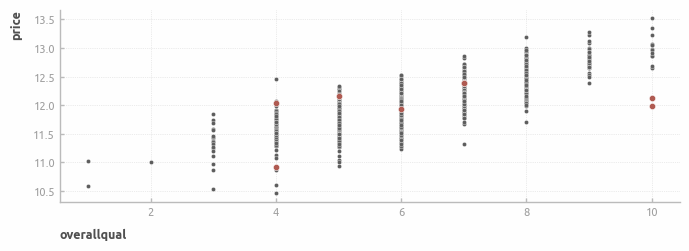

In [141]:
sns.scatterplot(
    data=train[~train.index.isin(outliers_idxs)],
    x='overallqual',
    y=target,
    color=palette[0]
);
sns.scatterplot(
    data=train[train.index.isin(outliers_idxs)],
    x='overallqual',
    y=target,
    color=palette[1],
    s=20
);

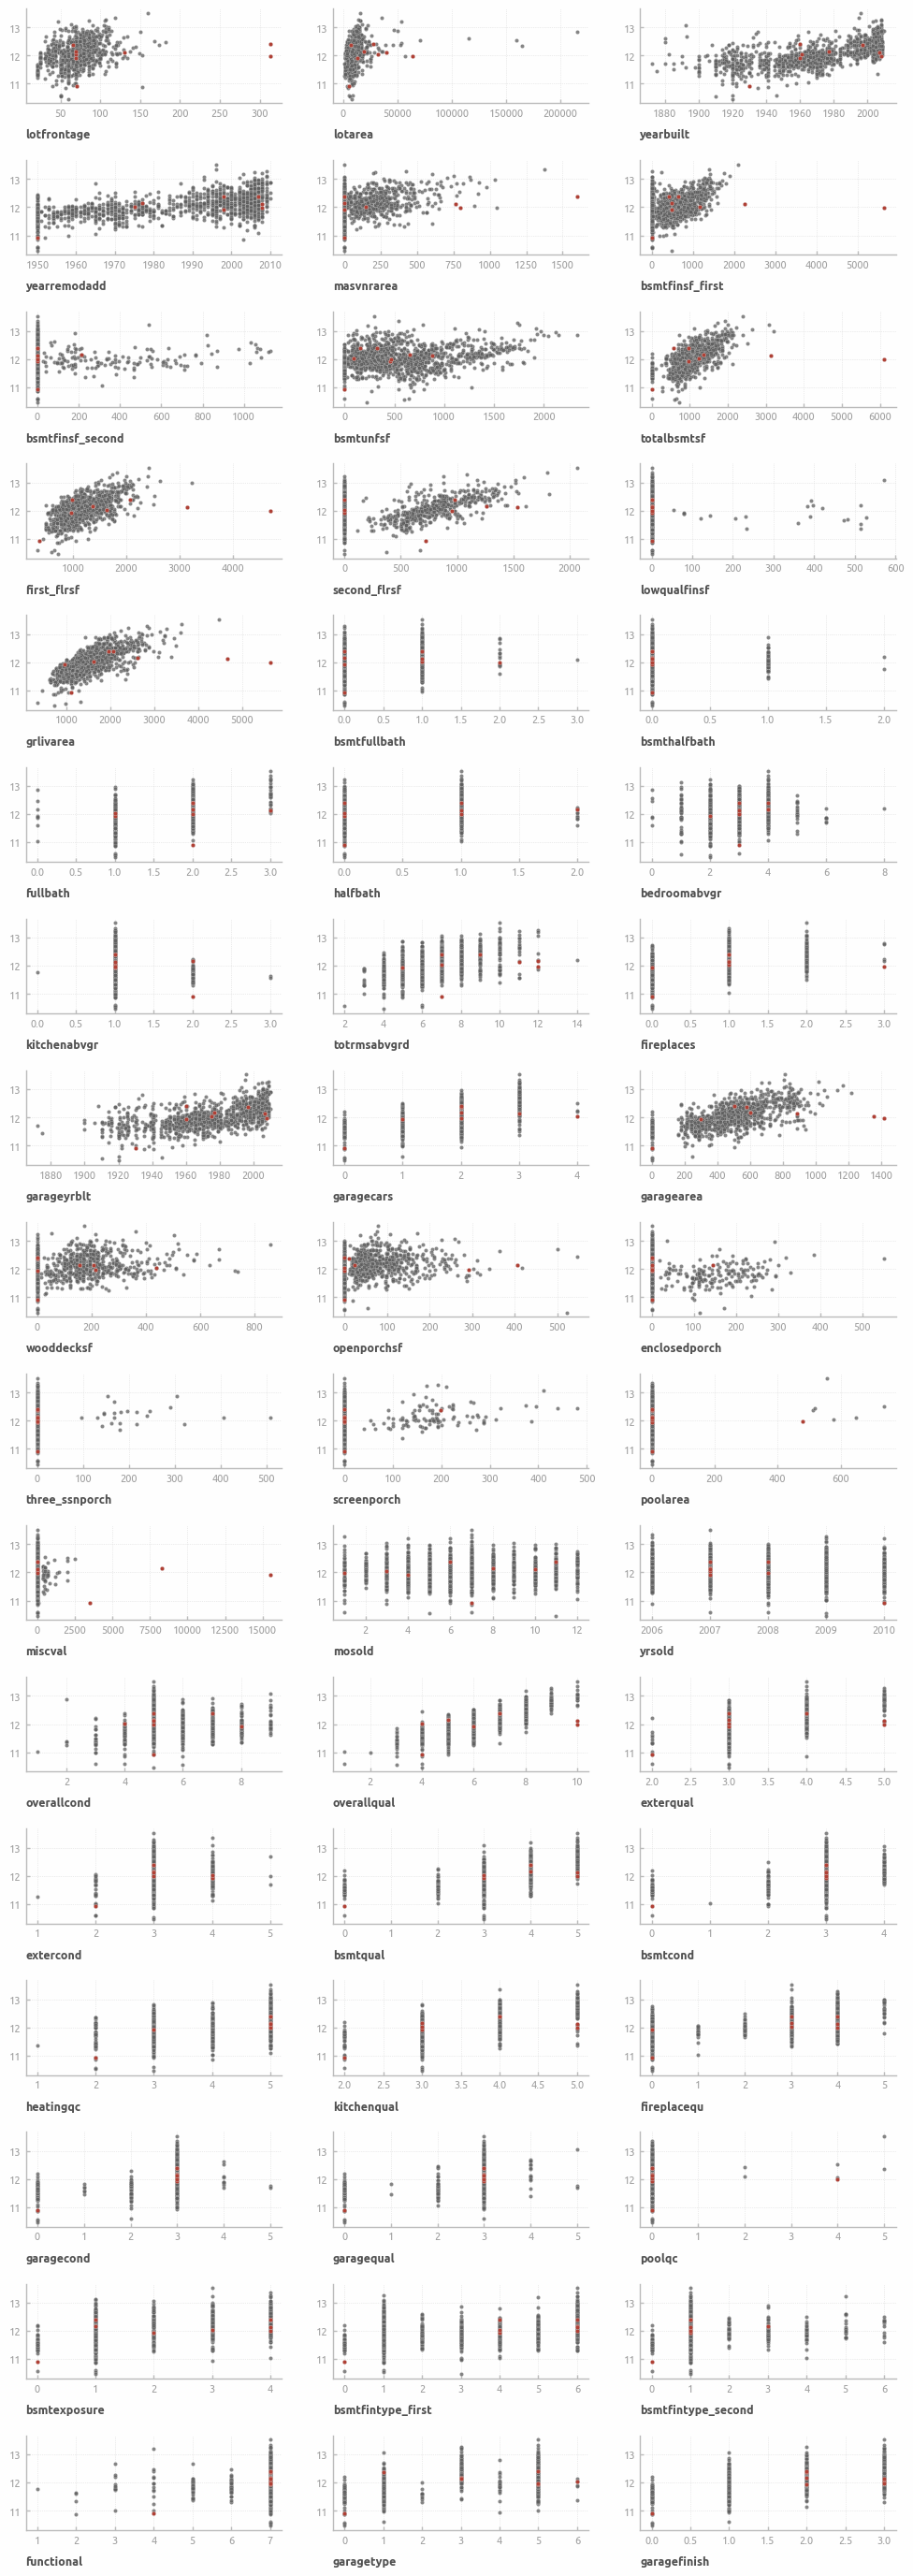

In [142]:
ncols = 3
nrows = int(np.round(len(numeric+ordinal) / ncols))
plot_idx = 1

f = plt.subplots(nrows, ncols, figsize=(12, 35))
for f in numeric+ordinal:
    plt.subplot(nrows, ncols, plot_idx)
    sns.scatterplot(
        x=f, y='price',
        data=train[~train.index.isin(outliers_idxs)],
        alpha=0.75,
        **scatter)
    plt.scatter(
        x=f, y='price',
        data=train[train.index.isin(outliers_idxs)],
        color=palette_bright[1], s=10, ec='0.9', lw=0.2)
    plt.ylabel(None)
    plot_idx +=1
plt.subplots_adjust(hspace=0.6)
plt.show()

In [143]:
idxs_drop = [523, 934, 1298]

### Outliers to Remove

In [144]:
train.shape

(1314, 81)

In [145]:
train = train.drop(idxs_drop, axis=0)

In [146]:
train.shape

(1311, 81)

## Corrected Correlation Matrix after dropping outliers

In [147]:
corr_df_corrected = train[numeric + ordinal + [target]].corr()

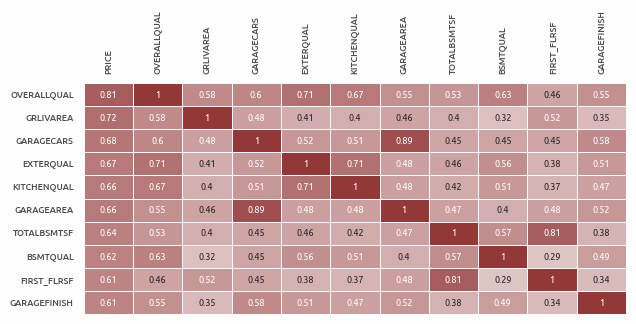

In [148]:
fig = plot_corr_matrix(
    data=corr_df_corrected, target=target, num_features=10,
    width=0.7, height=0.3, annot=6.5, labelsize=6.5,
    linecolor=theme, full=True, abs_results=True,
    df=False, df_limit=None
)

## Intermediate Model #1

In [151]:
train_im = train.copy()

In [152]:
train_im.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
907,908,50,RL,86.0,11500,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,0,6,2006,WD,Normal,12.429216
782,783,20,RL,67.0,16285,Pave,NA,IR2,Lvl,AllPub,...,0,0,NA,NA,0,6,2009,WD,Normal,12.139399
952,953,85,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,...,0,0,MnPrv,NA,0,4,2009,WD,Normal,11.804849
620,621,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NA,NA,0,9,2008,WD,Normal,11.112448
669,670,30,RL,80.0,11600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,0,7,2006,WD,Normal,11.831379


### Pipeline For GridSearch

In [153]:
encoder_im = OrdinalEncoder(
    encoding_method='ordered',
    variables=categorical_transform,
    missing_values='ignore',
    unseen='encode'
)

In [154]:
lgb1 = LGBMRegressor()

In [155]:
lgb_pipeline1 = Pipeline(steps=[
    ('encoder', encoder_im),
    ('estimator', lgb1)
])

### GridSearch Iteration 1

In [156]:
params1 = {
    'estimator__n_estimators': [25, 50, 75],
    'estimator__max_depth': [3, 6, 9],
    'estimator__num_leaves': [5, 38, 300],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__random_state': [seed],
    'estimator__verbose': [-1]
}

In [157]:
n_folds1 = 20

In [158]:
cv1 = GridSearchCV(
    estimator=lgb_pipeline1, 
    param_grid=params1,
    scoring='neg_root_mean_squared_error',
    cv=n_folds1
)

In [159]:
st = stopwatch.start()
cv1.fit(train_im[features], train_im[target])
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:03:53


In [160]:
models1 = []

range1 = range(len(cv1.cv_results_['params']))
for i in range1:
    models1.append(list(cv1.cv_results_['params'][i].values()))

range2 = range(len(models1))
for j in range2:
    models1[j] = ' / '.join(str(i) for i in models1[j])

In [161]:
keys1 = []
for i in range(0, n_folds1):
    keys1.append(
        'split' + str(i) + '_test_score'
    )

In [162]:
results1 = {key: cv1.cv_results_[key] for key in keys1}

In [163]:
results_df1 = pd.DataFrame(results1)

In [164]:
results_df1 = results_df1.T

In [165]:
idx_opt1 = np.argmax(cv1.cv_results_['mean_test_score'])

In [166]:
results_df1 = pd.melt(results_df1)

In [167]:
results_df1['opt'] = results_df1['variable']==idx_opt1
results_df1['opt'] = results_df1['opt'].astype(int)

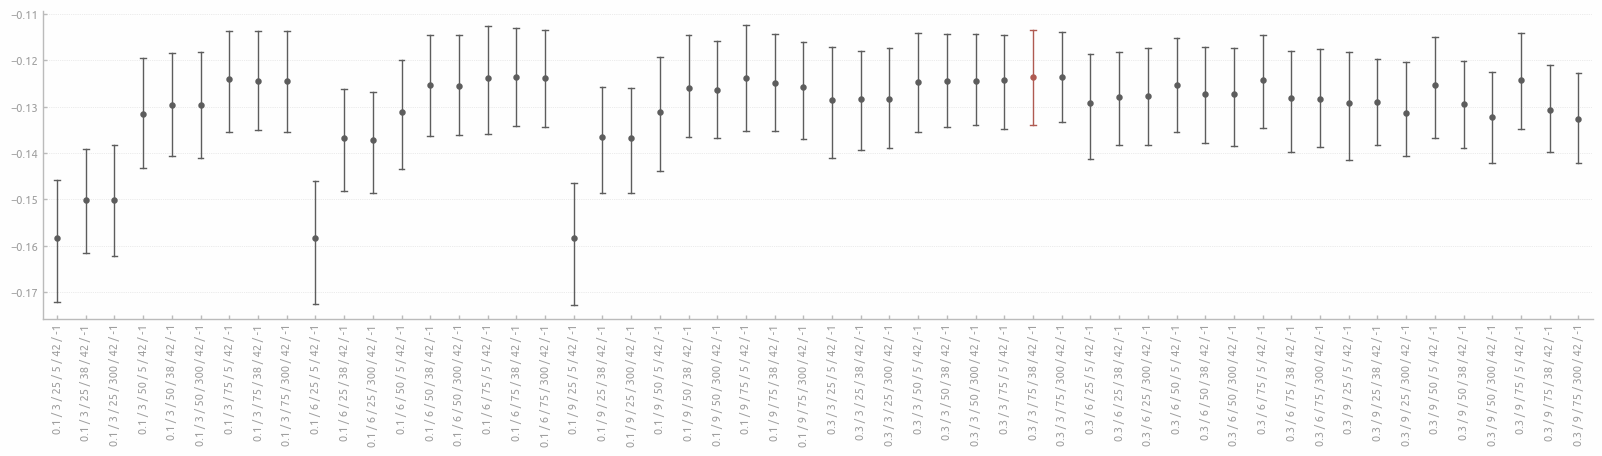

In [168]:
plt.figure(figsize=(20,4))

ax = sns.pointplot(
    results_df1,
    x='variable',
    y='value',
    hue='opt',
    markersize=3,
    linestyle='none',
    capsize=0.2,
    err_kws={'lw': 1},
    palette=[palette[0], palette[1]]
)
    
ax.set_xticks(ticks=list(set(results_df1['variable'])), labels=models1)
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
ax.get_legend().remove()

plt.show()

In [169]:
round(cv1.cv_results_['mean_test_score'][idx_opt1], 7)

-0.1235887

In [170]:
best_params1 = cv1.cv_results_['params'][idx_opt1]

In [171]:
best_params1

{'estimator__learning_rate': 0.3,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 75,
 'estimator__num_leaves': 38,
 'estimator__random_state': 42,
 'estimator__verbose': -1}

### GridSearch Iteration 2

In [172]:
lgb2 = LGBMRegressor()

In [173]:
lgb_pipeline2 = Pipeline(steps=[
    ('encoder', encoder_im),
    ('estimator', lgb2)
])

In [174]:
learning_rate = [best_params1['estimator__learning_rate']]

max_depth_val = best_params1['estimator__max_depth']
max_depth = list(np.arange(max_depth_val-2, max_depth_val+3))

n_estimators_val = best_params1['estimator__n_estimators']
n_estimators = [n_estimators_val-5, n_estimators_val, n_estimators_val+5]

num_leaves_val = best_params1['estimator__num_leaves']
num_leaves = [num_leaves_val-15, num_leaves_val, num_leaves_val+15]

In [175]:
params2 = {
    'estimator__learning_rate': learning_rate,
    'estimator__max_depth': max_depth,
    'estimator__n_estimators': n_estimators,
    'estimator__num_leaves': num_leaves,
    'estimator__random_state': [seed],
    'estimator__verbose': [-1]
}

In [176]:
params2

{'estimator__learning_rate': [0.3],
 'estimator__max_depth': [1, 2, 3, 4, 5],
 'estimator__n_estimators': [70, 75, 80],
 'estimator__num_leaves': [23, 38, 53],
 'estimator__random_state': [42],
 'estimator__verbose': [-1]}

In [177]:
n_folds2 = 20

In [178]:
cv2 = GridSearchCV(
    estimator=lgb_pipeline2, 
    param_grid=params2,
    scoring='neg_root_mean_squared_error',
    cv=n_folds2
)

In [179]:
st = stopwatch.start()
cv2.fit(train_im[features], train_im[target])
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:02:57


In [180]:
models2 = []

range1 = range(len(cv2.cv_results_['params']))
for i in range1:
    models2.append(list(cv2.cv_results_['params'][i].values()))

range2 = range(len(models2))
for j in range2:
    models2[j] = ' / '.join(str(i) for i in models2[j])

In [181]:
keys2 = []
for i in range(0, n_folds2):
    keys2.append(
        'split' + str(i) + '_test_score'
    )

In [182]:
results2 = {key: cv2.cv_results_[key] for key in keys2}

In [183]:
results_df2 = pd.DataFrame(results2)

In [184]:
results_df2 = results_df2.T

In [185]:
idx_opt2 = np.argmax(cv2.cv_results_['mean_test_score'])

In [186]:
results_df2 = pd.melt(results_df2)

In [187]:
results_df2['opt'] = results_df2['variable']==idx_opt2
results_df2['opt'] = results_df2['opt'].astype(int)

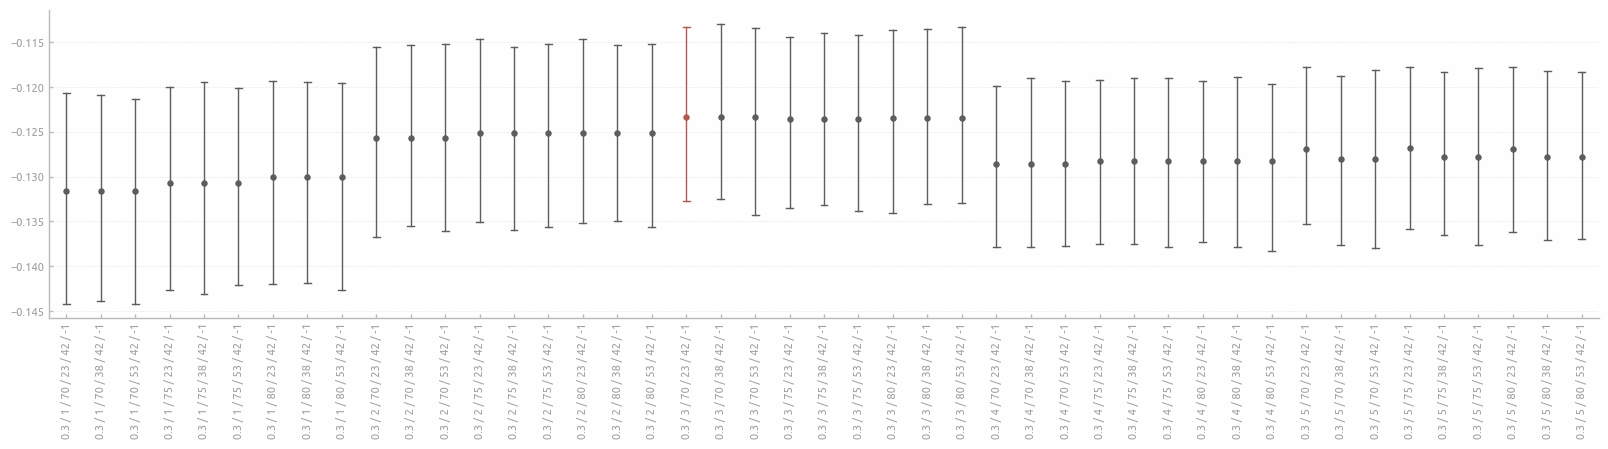

In [188]:
plt.figure(figsize=(20,4))

ax = sns.pointplot(
    results_df2,
    x='variable',
    y='value',
    hue='opt',
    markersize=3,
    linestyle='none',
    capsize=0.2,
    err_kws={'lw': 1},
    palette=[palette[0], palette[1]]
)
    
ax.set_xticks(ticks=list(set(results_df2['variable'])), labels=models2)
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
ax.get_legend().remove()

plt.show()

In [189]:
rmse_train_opt = cv2.cv_results_['mean_test_score'][idx_opt2]

In [190]:
rmse_train_opt

-0.12334981144161886

In [191]:
rmse_train_opt.round(4)

-0.1233

In [192]:
params_opt = cv2.cv_results_['params'][idx_opt2]

In [193]:
params_opt

{'estimator__learning_rate': 0.3,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 70,
 'estimator__num_leaves': 23,
 'estimator__random_state': 42,
 'estimator__verbose': -1}

In [194]:
params = {}
for key in params_opt.keys():
    new_key = key.lstrip('estimator')
    new_key = new_key.lstrip('__')
    params[new_key] = params_opt[key]

In [195]:
params

{'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 70,
 'num_leaves': 23,
 'random_state': 42,
 'verbose': -1}

In [196]:
lgb_opt = LGBMRegressor(**params)

In [197]:
train_im[features] = encoder_im.fit_transform(
    train_im[features], train_im[target])

In [198]:
train_im.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
907,908,5,3,86.0,11500,1,2,1,1,1,...,0,0,3,2,0,6,2006,5,4,12.429216
782,783,10,3,67.0,16285,1,2,3,1,1,...,0,0,3,2,0,6,2009,5,4,12.139399
952,953,7,3,60.0,7200,1,2,0,1,1,...,0,0,2,2,0,4,2009,5,4,11.804849
620,621,0,3,45.0,8248,1,0,0,1,1,...,0,0,3,2,0,9,2008,5,4,11.112448
669,670,0,3,80.0,11600,1,2,0,1,1,...,0,0,3,2,0,7,2006,5,4,11.831379


In [199]:
lgb_opt.fit(train_im[features], train_im[target])

LGBMRegressor(learning_rate=0.3, max_depth=3, n_estimators=70, num_leaves=23,
              random_state=42, verbose=-1)

In [200]:
feature_importance = pd.DataFrame({
    'Feature': lgb_opt.feature_name_,
    'Importance': lgb_opt.feature_importances_
})
feature_importance.sort_values('Importance', ascending=False, inplace=True)

In [201]:
data_plot = feature_importance.loc[feature_importance['Importance'] > 0, :]
data_plot = data_plot.sort_values('Importance', ascending=False)

In [202]:
data_plot.head()

,Feature,Importance
13,grlivarea,30
60,neighborhood,24
2,lotarea,20
24,garagearea,19
9,totalbsmtsf,17


In [203]:
values = data_plot['Importance'][:10]
labels = data_plot['Feature'][:10]

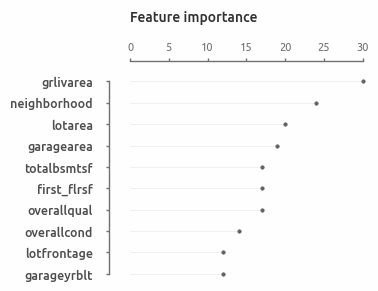

Images 'feature_importance.png' and 'feature_importance.svg' successfully saved into 'docs/img/Section2-Explore-and-Clean' directory


In [153]:
fig = plot_bar_horizontal(
    values=values,
    labels=labels,
    labelsize=9,
    figsize=(3, 2.5),
    kind='lol',
    width=0.5,
    s=6,
    x_lim_right=30
)
savefig('feature_importance', save_img)

## Save Data

In [205]:
datasets_dict['train'] = train

In [206]:
simulation_datasets_dict['train_iter1'] = train_im
simulation_datasets_dict['features_iter1'] = features

In [207]:
estimators_dict['lgb_iter1'] = lgb_opt
estimators_dict['encoder_iter1'] = encoder_im

In [208]:
evaluation_dict['cv_iter1'] = cv2

In [209]:
saveit(datasets_dict, 'datasets_dict', save_files)

In [210]:
saveit(groups_dict, 'groups_dict', save_files)

In [211]:
saveit(simulation_datasets_dict, 'simulation_datasets_dict', save_files)

In [212]:
saveit(estimators_dict, 'estimators_dict', save_files)

In [213]:
saveit(evaluation_dict, 'evaluation_dict', save_files)

In [214]:
saveit(params, 'params', save_files)

In [215]:
saveit(feature_importance, 'feature_importance', save_files)

### Save Session

In [154]:
save_session(session_name)

### Execution time

In [217]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:09:15
